In [1]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  
import seaborn as sns
import warnings

In [2]:
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)

# Current application

In [3]:
df_application_current = pd.read_csv('/kaggle/input/loan-defaulter/application_data.csv')
df_application_current.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [4]:
df_application_current.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [5]:
df_application_current.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.074490,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.97

### Handaling missing values in columns


In [6]:
# Count missing values column wise
df_application_current.isnull().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 122, dtype: int64

In [7]:
# List the columns having more than 30% missing values
cols_30_percent_missing_values = (df_application_current.columns[(round(100*(df_application_current.isnull().sum()/len(df_application_current.index)), 2)) >= 30]).tolist()
cols_30_percent_missing_values

['OWN_CAR_AGE',
 'OCCUPATION_TYPE',
 'EXT_SOURCE_1',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_AVG',
 'YEARS_BUILD_AVG',
 'COMMONAREA_AVG',
 'ELEVATORS_AVG',
 'ENTRANCES_AVG',
 'FLOORSMAX_AVG',
 'FLOORSMIN_AVG',
 'LANDAREA_AVG',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAREA_AVG',
 'NONLIVINGAPARTMENTS_AVG',
 'NONLIVINGAREA_AVG',
 'APARTMENTS_MODE',
 'BASEMENTAREA_MODE',
 'YEARS_BEGINEXPLUATATION_MODE',
 'YEARS_BUILD_MODE',
 'COMMONAREA_MODE',
 'ELEVATORS_MODE',
 'ENTRANCES_MODE',
 'FLOORSMAX_MODE',
 'FLOORSMIN_MODE',
 'LANDAREA_MODE',
 'LIVINGAPARTMENTS_MODE',
 'LIVINGAREA_MODE',
 'NONLIVINGAPARTMENTS_MODE',
 'NONLIVINGAREA_MODE',
 'APARTMENTS_MEDI',
 'BASEMENTAREA_MEDI',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'YEARS_BUILD_MEDI',
 'COMMONAREA_MEDI',
 'ELEVATORS_MEDI',
 'ENTRANCES_MEDI',
 'FLOORSMAX_MEDI',
 'FLOORSMIN_MEDI',
 'LANDAREA_MEDI',
 'LIVINGAPARTMENTS_MEDI',
 'LIVINGAREA_MEDI',
 'NONLIVINGAPARTMENTS_MEDI',
 'NONLIVINGAREA_MEDI',
 'FONDKAPREMONT_MODE',
 'HOUSETYPE_MO

In [8]:
# Delete the columns having more than 30% missing values
df_application_current = df_application_current.drop(cols_30_percent_missing_values,axis=1)

In [9]:
df_application_current.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       

##### List and delete the columns, which are not much relevant for the analysis

In [10]:
cols_irrelevant = ['DAYS_REGISTRATION','FLAG_MOBIL','FLAG_EMP_PHONE','FLAG_WORK_PHONE','FLAG_CONT_MOBILE',
                   'FLAG_PHONE','FLAG_EMAIL','WEEKDAY_APPR_PROCESS_START','HOUR_APPR_PROCESS_START','LIVE_REGION_NOT_WORK_REGION',
                   'REG_CITY_NOT_LIVE_CITY','REG_CITY_NOT_WORK_CITY','LIVE_CITY_NOT_WORK_CITY','DAYS_LAST_PHONE_CHANGE',
                  'OBS_30_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE',
                  'NAME_TYPE_SUITE']
cols_irrelevant

['DAYS_REGISTRATION',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'WEEKDAY_APPR_PROCESS_START',
 'HOUR_APPR_PROCESS_START',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'DAYS_LAST_PHONE_CHANGE',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'NAME_TYPE_SUITE']

In [11]:
# Delete the columns which are irrelevant for the analysis
df_application_current = df_application_current.drop(cols_irrelevant,axis=1)

In [12]:
df_application_current.shape

(307511, 53)

In [13]:
df_application_current.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_ID_PUBLISH', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'ORGANIZATION_TYPE', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4',
       'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7',
       'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10',
       'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13',
       'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16',
       'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19',
       'FLAG_DOCU

#### Treating Missing Values in Rows

In [14]:
# Count the number of rows having more than 50% missing values
# As there are none of the rows, so we are not deleting rows on basis of this
len(df_application_current[df_application_current.isnull().sum(axis=1) > (len(df_application_current.columns)//2)].index)

0

In [15]:
# Percent of missing values in columns
(round(100*(df_application_current.isnull().sum()/len(df_application_current.index)),2))

SK_ID_CURR                      0.00
TARGET                          0.00
NAME_CONTRACT_TYPE              0.00
CODE_GENDER                     0.00
FLAG_OWN_CAR                    0.00
FLAG_OWN_REALTY                 0.00
CNT_CHILDREN                    0.00
AMT_INCOME_TOTAL                0.00
AMT_CREDIT                      0.00
AMT_ANNUITY                     0.00
AMT_GOODS_PRICE                 0.09
NAME_INCOME_TYPE                0.00
NAME_EDUCATION_TYPE             0.00
NAME_FAMILY_STATUS              0.00
NAME_HOUSING_TYPE               0.00
REGION_POPULATION_RELATIVE      0.00
DAYS_BIRTH                      0.00
DAYS_EMPLOYED                   0.00
DAYS_ID_PUBLISH                 0.00
CNT_FAM_MEMBERS                 0.00
REGION_RATING_CLIENT            0.00
REGION_RATING_CLIENT_W_CITY     0.00
REG_REGION_NOT_LIVE_REGION      0.00
REG_REGION_NOT_WORK_REGION      0.00
ORGANIZATION_TYPE               0.00
EXT_SOURCE_2                    0.21
EXT_SOURCE_3                   19.83
F

In [16]:
# Count the rows for which EXT_SOURCE_2 and EXT_SOURCE_3 both are empty
len(df_application_current[np.isnan(df_application_current['EXT_SOURCE_2']) & np.isnan(df_application_current['EXT_SOURCE_3'])])

230

In [17]:
# As there are only 230 such records we can delete those.
# Note:- As we have total 307511 records deleting only 230 records will not affect our further analysis
df_application_current = df_application_current[(~(np.isnan(df_application_current['EXT_SOURCE_2']) & np.isnan(df_application_current['EXT_SOURCE_3'])))]

In [18]:
# Comparing EXT_SOURCE_2 and EXT_SOURCE_3 column 
round(df_application_current.loc[:, ['EXT_SOURCE_2', 'EXT_SOURCE_3']].describe(),3)

,EXT_SOURCE_2,EXT_SOURCE_3
count,306851.000,246546.000
mean,0.514,0.511
std,0.191,0.195
min,0.000,0.001
25%,0.392,0.371
50%,0.566,0.535
75%,0.664,0.669
max,0.855,0.896


We can see that the difference between mean and median is quite narrow for both the columns. Also, the variation from 25th to 75th percentile is equally distributed. 
Thus, let's impute the missing values by the mean value of `EXT_SOURCE_2` and `EXT_SOURCE_3` respectively.

In [19]:
# Imputing EXT_SOURCE_2 and EXT_SOURCE_3 by mean values
df_application_current.loc[np.isnan(df_application_current['EXT_SOURCE_2']), ['EXT_SOURCE_2']] = df_application_current['EXT_SOURCE_2'].mean()
df_application_current.loc[np.isnan(df_application_current['EXT_SOURCE_3']), ['EXT_SOURCE_3']] = df_application_current['EXT_SOURCE_3'].mean()


In [20]:
(round(100*(df_application_current.isnull().sum()/len(df_application_current.index)),2))

SK_ID_CURR                      0.00
TARGET                          0.00
NAME_CONTRACT_TYPE              0.00
CODE_GENDER                     0.00
FLAG_OWN_CAR                    0.00
FLAG_OWN_REALTY                 0.00
CNT_CHILDREN                    0.00
AMT_INCOME_TOTAL                0.00
AMT_CREDIT                      0.00
AMT_ANNUITY                     0.00
AMT_GOODS_PRICE                 0.09
NAME_INCOME_TYPE                0.00
NAME_EDUCATION_TYPE             0.00
NAME_FAMILY_STATUS              0.00
NAME_HOUSING_TYPE               0.00
REGION_POPULATION_RELATIVE      0.00
DAYS_BIRTH                      0.00
DAYS_EMPLOYED                   0.00
DAYS_ID_PUBLISH                 0.00
CNT_FAM_MEMBERS                 0.00
REGION_RATING_CLIENT            0.00
REGION_RATING_CLIENT_W_CITY     0.00
REG_REGION_NOT_LIVE_REGION      0.00
REG_REGION_NOT_WORK_REGION      0.00
ORGANIZATION_TYPE               0.00
EXT_SOURCE_2                    0.00
EXT_SOURCE_3                    0.00
F

In [21]:
# Treating missing values in AMT_GOODS_PRICE
df_application_current['AMT_GOODS_PRICE'].describe().apply(lambda x: '%.2f' % x)

count     307004.00
mean      538484.20
std       369486.08
min        40500.00
25%       238500.00
50%       450000.00
75%       679500.00
max      4050000.00
Name: AMT_GOODS_PRICE, dtype: object

<AxesSubplot:>

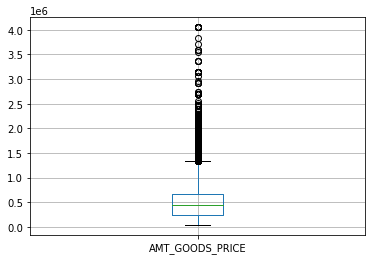

In [22]:
df_application_current.boxplot(column =['AMT_GOODS_PRICE']) 

Nous constatons que l'écart-type de `AMT_GOODS_PRICE` est très élevé. Il y a également un grand nombre de valeurs aberrantes dans la colonne. Ainsi, l'imputation des valeurs manquantes avec la moyenne ou la médiane sera biaisée dans ce cas. Il est donc préférable de supprimer les lignes où `AMT_GOODS_PRICE` est manquant.
En fait, ces lignes ne représentent que 0,09 % de l'ensemble des enregistrements

In [23]:
df_application_current = df_application_current[~np.isnan(df_application_current['AMT_GOODS_PRICE'])]

Nous disposons de 5 colonnes pour le nombre de demandes de renseignements sur le client adressées au bureau de crédit. Il n'est pas très logique de compter le nombre de demandes pour une période très courte, par exemple une heure, un jour ou une semaine avant la date de la demande. D'un autre côté, il est également moins logique de compter le nombre de demandes pour une très longue période de temps. Par conséquent, nous pourrons compter sur un trimestre, ce qui n'est ni une période trop courte ni une période trop longue. 
Nous devons donc faire deux choses à présent :-)
1. Nous allons traiter les données manquantes pour la colonne `AMT_REQ_CREDIT_BUREAU_QRT`
2. Nous allons supprimer la colonne du décompte de l'heure, du jour, de la semaine, du mois et de l'année.

In [24]:
# Manipulation AMT_REQ_CREDIT_BUREAU_QRT 
df_application_current['AMT_REQ_CREDIT_BUREAU_QRT'].describe()

count    265662.000000
mean          0.265552
std           0.794315
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         261.000000
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: float64

Il s'agit d'une variable de type entier, qui peut donc prendre les valeurs 0, 1, 2, etc. Nous ne pouvons pas imputer les NaN par la moyenne ou la médiane (1,53 demande n'a pas de sens !).
Nous devons donc les imputer par le mode -
la valeur la plus fréquente, si cette approche est possible.

In [25]:
# converting AMT_REQ_CREDIT_BUREAU_QRT to type 'category'
df_application_current['AMT_REQ_CREDIT_BUREAU_QRT'] = df_application_current['AMT_REQ_CREDIT_BUREAU_QRT'].astype('category')

# displaying frequencies of each category
df_application_current['AMT_REQ_CREDIT_BUREAU_QRT'].value_counts()

0.0      215133
1.0       33836
2.0       14393
3.0        1716
4.0         476
5.0          64
6.0          28
7.0           7
8.0           7
19.0          1
261.0         1
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: int64

La valeur la plus courante de ``AMT_REQ_CREDIT_BUREAU_QRT`` est 0, nous allons donc imputer les NaN par cette valeur.

In [26]:
# Imputing AMT_REQ_CREDIT_BUREAU_QRT with 0
df_application_current.loc[pd.isnull(df_application_current['AMT_REQ_CREDIT_BUREAU_QRT']), ['AMT_REQ_CREDIT_BUREAU_QRT']] = 0

In [27]:
# Deleting AMT_REQ_CREDIT_BUREAU_HOUR, AMT_REQ_CREDIT_BUREAU_DAY, AMT_REQ_CREDIT_BUREAU_WEEK, AMT_REQ_CREDIT_BUREAU_MON, AMT_REQ_CREDIT_BUREAU_YEAR
df_application_current = df_application_current.drop(['AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_YEAR'],axis=1)

In [28]:
(round(100*(df_application_current.isnull().sum()/len(df_application_current.index)),2))

SK_ID_CURR                     0.0
TARGET                         0.0
NAME_CONTRACT_TYPE             0.0
CODE_GENDER                    0.0
FLAG_OWN_CAR                   0.0
FLAG_OWN_REALTY                0.0
CNT_CHILDREN                   0.0
AMT_INCOME_TOTAL               0.0
AMT_CREDIT                     0.0
AMT_ANNUITY                    0.0
AMT_GOODS_PRICE                0.0
NAME_INCOME_TYPE               0.0
NAME_EDUCATION_TYPE            0.0
NAME_FAMILY_STATUS             0.0
NAME_HOUSING_TYPE              0.0
REGION_POPULATION_RELATIVE     0.0
DAYS_BIRTH                     0.0
DAYS_EMPLOYED                  0.0
DAYS_ID_PUBLISH                0.0
CNT_FAM_MEMBERS                0.0
REGION_RATING_CLIENT           0.0
REGION_RATING_CLIENT_W_CITY    0.0
REG_REGION_NOT_LIVE_REGION     0.0
REG_REGION_NOT_WORK_REGION     0.0
ORGANIZATION_TYPE              0.0
EXT_SOURCE_2                   0.0
EXT_SOURCE_3                   0.0
FLAG_DOCUMENT_2                0.0
FLAG_DOCUMENT_3     

Nous disposons à présent d'un cadre de données sans aucune valeur manquante. Regardons enfin combien de lignes nous avons perdues dans le processus.
Au début, nous avions `307511` lignes.

In [29]:
df_application_current.shape

(307004, 48)

In [30]:
# Percentage of rows lost
(100 - 100*(len(df_application_current.index)/307511))

0.16487215091493113

Nous venons de perdre 0,16 % de lignes dans l'ensemble du processus de nettoyage des données.

#### Converting `DAYS_BIRTH` column into `AGE` column for readablity and analysis

In [31]:
# Divide 'DAYS_BIRTH' by 365 for taking Age
df_application_current['AGE'] = abs(df_application_current['DAYS_BIRTH']//365)


In [32]:
# Drop 'DAYS_BIRTH' column
df_application_current = df_application_current.drop(['DAYS_BIRTH'],axis=1)

#### Converting `DAYS_EMPLOYED` column into `YEARS_EMPLOYED` column for readablity and analysis

In [33]:
# Divide 'DAYS_EMPLOYED' by 365 for YEAR_EMPLOYED
df_application_current['YEARS_EMPLOYED'] = abs(df_application_current['DAYS_EMPLOYED']//365)

In [34]:
# Drop 'DAYS_EMPLOYED' column
df_application_current = df_application_current.drop(['DAYS_EMPLOYED'],axis=1)

In [35]:
df_application_current.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_ID_PUBLISH,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_QRT,AGE,YEARS_EMPLOYED
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-2120,1.0,2,2,0,0,Business Entity Type 3,0.262949,0.139376,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,26,2
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,House / apartment,0.003541,-291,2.0,1,1,0,0,School,0.622246,0.510853,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,46,4
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-2531,1.0,2,2,0,0,Government,0.555912,0.729567,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,53,1
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-2437,2.0,2,2,0,0,Business Entity Type 3,0.650442,0.510853,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,53,9
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-3458,1.0,2,2,0,0,Religion,0.322738,0.510853,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,55,9


### Removing outliers

In [36]:
# Trouver des valeurs aberrantes dans toutes les colonnes numériques avec la règle du 1,5 IQR et supprimer les enregistrements aberrants.  
col_list_outlier = ['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','AGE']
for col in col_list_outlier: 
    q1 = df_application_current[col].quantile(0.25)
    q3 = df_application_current[col].quantile(0.75)
    iqr = q3-q1
    range_low  = q1-1.5*iqr
    range_high = q3+1.5*iqr
    df_application_current = df_application_current.loc[(df_application_current[col] > range_low) & (df_application_current[col] < range_high)]

df_application_current.shape

(275984, 48)

In [37]:
# Pourcentage de lignes perdues
round((100 - 100*(len(df_application_current.index)/307511)),2)

10.25

Bien que nous ayons perdu environ `10%` de lignes dans l'exercice de traitement des valeurs aberrantes, nous nous sommes débarrassés des valeurs aberrantes pour une analyse équitable des données. 

### Checking Data Imbalance(déséquilibre)

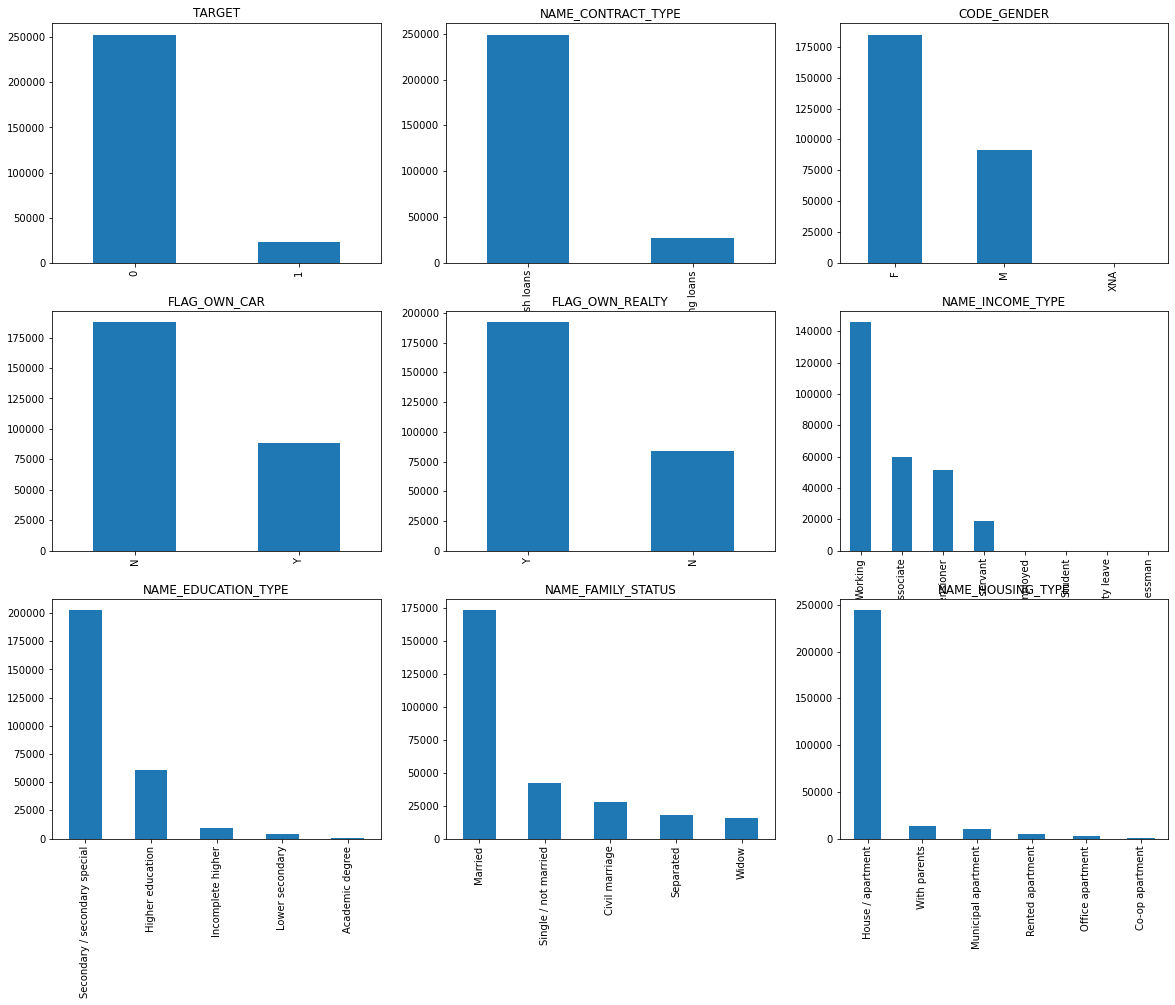

In [38]:
# Listing columns for checking data imbalance and plotting them
col_list = ['TARGET','NAME_CONTRACT_TYPE','CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY','NAME_INCOME_TYPE',
            'NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE']
k=0
plt.figure(figsize=(20,15))
for col in col_list:    
    k=k+1
    plt.subplot(3, 3,k)    
    df_application_current[col].value_counts().plot(kind='bar');
    plt.title(col)

Nous pouvons constater qu'il y a un déséquilibre des données dans les colonnes ci-dessous:-
1. TARGET -  Il y a très peu de defaulters(1) compare to non defaulters(0)
2. NAME_CONTRACT_TYPE - There are very few Revolving loans than Cash loans
3. NAME_EDUCATION_TYPE - Most of the loans applied by Secondary/Secondary special educated people
4. NAME_FAMILY_STATUS - Most of the loans applied by Married people.
5. NAME_HOUSING_TYPE - Most of the application came from Home/appartment owner


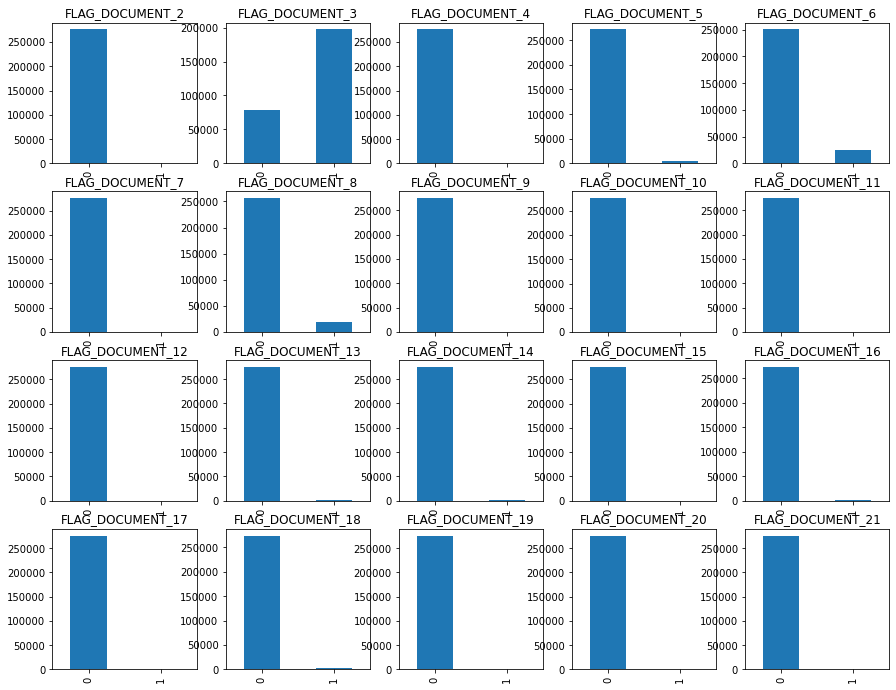

In [39]:
# Plotting all the FLAG_DOCUMENT columns to check data imbalance
k=0
plt.figure(figsize=(15,15))
for i in range(2,22) :    
    k=k+1
    plt.subplot(5, 5,k)    
    col_name = 'FLAG_DOCUMENT_'+str(i)
    df_application_current[col_name].value_counts().plot(kind='bar');
    plt.title(col_name)

Comme nous pouvons le voir, à l'exception de ***FLAG_DOCUMENT_3***, toutes les colonnes ont un nombre négligeable de 1. Nous supprimons donc toutes les colonnes FLAG_DOCUMENT à l'exception de FLAG_DOCUMENT_3.

In [40]:
# Delete all teh FLAG_DOCUMENT columns except FLAG_DOCUMENT_3
df_application_current.drop('FLAG_DOCUMENT_2',axis=1,inplace=True)
for i in range(4,22):
    col = 'FLAG_DOCUMENT_'+str(i)
    df_application_current.drop(col,axis=1,inplace=True)

#### Binning of `AGE`,  `AMT_INCOME_TOTAL`, `AMT_CREDIT` and `EXT_SOURCE_SCORE` columns
`

####  Création de trois groupes d'âge - les jeunes, les personnes d'âge moyen et les seniors


In [41]:
df_application_current['AGE'].describe()

count    275984.000000
mean         44.432492
std          12.117228
min          21.000000
25%          34.000000
50%          44.000000
75%          55.000000
max          70.000000
Name: AGE, dtype: float64

In [42]:
#  Définir la fonction de catégorisation AGE_GROUP (Jeune, Moyen et Senior) (Young, Mid age and Senior)
def age_group(x):
    if (x < 40):
        return 'Young'
    elif (x >= 40 and x < 60):
        return 'Mid Age'
    else:
        return 'Senior'

In [43]:
#Creating new column AGE_GROUP
df_application_current['AGE_GROUP'] = df_application_current['AGE'].apply(age_group)
df_application_current.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_ID_PUBLISH,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,FLAG_DOCUMENT_3,AMT_REQ_CREDIT_BUREAU_QRT,AGE,YEARS_EMPLOYED,AGE_GROUP
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-2120,1.0,2,2,0,0,Business Entity Type 3,0.262949,0.139376,1,0.0,26,2,Young
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,House / apartment,0.003541,-291,2.0,1,1,0,0,School,0.622246,0.510853,1,0.0,46,4,Mid Age
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-2531,1.0,2,2,0,0,Government,0.555912,0.729567,0,0.0,53,1,Mid Age
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-2437,2.0,2,2,0,0,Business Entity Type 3,0.650442,0.510853,1,0.0,53,9,Mid Age
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-3458,1.0,2,2,0,0,Religion,0.322738,0.510853,0,0.0,55,9,Mid Age


#### Création de trois groupes de montants de crédit - élevé, moyen et faible

In [44]:
round(df_application_current['AMT_CREDIT'].describe(),2)

count     275984.00
mean      530094.81
std       318167.91
min        45000.00
25%       269550.00
50%       472500.00
75%       753840.00
max      1558813.50
Name: AMT_CREDIT, dtype: float64

In [45]:
# Define function for categorizing CREDIT_GROUP (High, Medium and Low)
def credit_group(x):
    if (x < 500000):
        return 'Low'
    elif (x >= 500000 and x < 750000):
        return 'Medium'
    else:
        return 'High'

In [46]:
#Creating new column AGE_GROUP
df_application_current['CREDIT_GROUP'] = df_application_current['AMT_CREDIT'].apply(credit_group)
df_application_current.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_ID_PUBLISH,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,FLAG_DOCUMENT_3,AMT_REQ_CREDIT_BUREAU_QRT,AGE,YEARS_EMPLOYED,AGE_GROUP,CREDIT_GROUP
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-2120,1.0,2,2,0,0,Business Entity Type 3,0.262949,0.139376,1,0.0,26,2,Young,Low
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,House / apartment,0.003541,-291,2.0,1,1,0,0,School,0.622246,0.510853,1,0.0,46,4,Mid Age,High
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-2531,1.0,2,2,0,0,Government,0.555912,0.729567,0,0.0,53,1,Mid Age,Low
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-2437,2.0,2,2,0,0,Business Entity Type 3,0.650442,0.510853,1,0.0,53,9,Mid Age,Low
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-3458,1.0,2,2,0,0,Religion,0.322738,0.510853,0,0.0,55,9,Mid Age,Medium


#### Création de trois groupes de revenus - élevé, moyen et faible

In [47]:
df_application_current['AMT_INCOME_TOTAL'].describe()

count    275984.000000
mean     149865.585983
std       61031.656226
min       25650.000000
25%      112500.000000
50%      135000.000000
75%      180000.000000
max      337050.000000
Name: AMT_INCOME_TOTAL, dtype: float64

In [48]:
# Define function for categorizing AMT_INCOME_TOTAL (Low, Medium and High)
def income_group(x):
    if (x < 100000):
        return 'Low'
    elif(x >= 100000 and x < 150000):
        return 'Medium'
    else:
        return 'High'

In [49]:
# Creating column INCOME_GROUP with AMT_INCOME_TOTAL (Low, Medium and High)
df_application_current['INCOME_GROUP'] = df_application_current['AMT_INCOME_TOTAL'].apply(income_group)
df_application_current.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_ID_PUBLISH,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,FLAG_DOCUMENT_3,AMT_REQ_CREDIT_BUREAU_QRT,AGE,YEARS_EMPLOYED,AGE_GROUP,CREDIT_GROUP,INCOME_GROUP
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-2120,1.0,2,2,0,0,Business Entity Type 3,0.262949,0.139376,1,0.0,26,2,Young,Low,High
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,House / apartment,0.003541,-291,2.0,1,1,0,0,School,0.622246,0.510853,1,0.0,46,4,Mid Age,High,High
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-2531,1.0,2,2,0,0,Government,0.555912,0.729567,0,0.0,53,1,Mid Age,Low,Low
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-2437,2.0,2,2,0,0,Business Entity Type 3,0.650442,0.510853,1,0.0,53,9,Mid Age,Low,Medium
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-3458,1.0,2,2,0,0,Religion,0.322738,0.510853,0,0.0,55,9,Mid Age,Medium,Medium


Pour simplifier l'analyse du score normalisé à partir d'une source de données externe, nous prenons la moyenne de deux sources de données externes différentes (EXT_SOURCE_2 et EXT_SOURCE_3) et créons une colonne appelée **EXT_SOURCE_SCORE**.


In [50]:
df_application_current['EXT_SOURCE_SCORE'] = round(((df_application_current['EXT_SOURCE_2'] + df_application_current['EXT_SOURCE_3'])/2),2)
df_application_current.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_ID_PUBLISH,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,FLAG_DOCUMENT_3,AMT_REQ_CREDIT_BUREAU_QRT,AGE,YEARS_EMPLOYED,AGE_GROUP,CREDIT_GROUP,INCOME_GROUP,EXT_SOURCE_SCORE
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-2120,1.0,2,2,0,0,Business Entity Type 3,0.262949,0.139376,1,0.0,26,2,Young,Low,High,0.20
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,House / apartment,0.003541,-291,2.0,1,1,0,0,School,0.622246,0.510853,1,0.0,46,4,Mid Age,High,High,0.57
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-2531,1.0,2,2,0,0,Government,0.555912,0.729567,0,0.0,53,1,Mid Age,Low,Low,0.64
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-2437,2.0,2,2,0,0,Business Entity Type 3,0.650442,0.510853,1,0.0,53,9,Mid Age,Low,Medium,0.58
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-3458,1.0,2,2,0,0,Religion,0.322738,0.510853,0,0.0,55,9,Mid Age,Medium,Medium,0.42


In [51]:
# Dropping (EXT_SOURCE_2 and EXT_SOURCE_3 columns
df_application_current.drop(['EXT_SOURCE_2','EXT_SOURCE_3'],axis=1,inplace=True)

### Création de trois groupes de scores pour les sources externes - élevé, moyen et faible

In [52]:
df_application_current['EXT_SOURCE_SCORE'].describe()

count    275984.000000
mean          0.508588
std           0.135916
min           0.000000
25%           0.420000
50%           0.520000
75%           0.610000
max           0.840000
Name: EXT_SOURCE_SCORE, dtype: float64

In [53]:
# Define function for categorizing EXT_SOURCE_SCORE (Low, Medium and High)
def ext_source_group(x):
    if (x < 0.4):
        return 'Low'
    elif (x >= 0.4 and x < 0.6):
        return 'Medium'
    else:
        return 'High'

In [54]:
# Creating column EXT_SCORE_CATEGORY with High, medium and Low
df_application_current['EXT_SCORE_CATEGORY'] = df_application_current['EXT_SOURCE_SCORE'].apply(ext_source_group)
df_application_current.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_ID_PUBLISH,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,ORGANIZATION_TYPE,FLAG_DOCUMENT_3,AMT_REQ_CREDIT_BUREAU_QRT,AGE,YEARS_EMPLOYED,AGE_GROUP,CREDIT_GROUP,INCOME_GROUP,EXT_SOURCE_SCORE,EXT_SCORE_CATEGORY
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-2120,1.0,2,2,0,0,Business Entity Type 3,1,0.0,26,2,Young,Low,High,0.20,Low
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,House / apartment,0.003541,-291,2.0,1,1,0,0,School,1,0.0,46,4,Mid Age,High,High,0.57,Medium
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-2531,1.0,2,2,0,0,Government,0,0.0,53,1,Mid Age,Low,Low,0.64,High
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-2437,2.0,2,2,0,0,Business Entity Type 3,1,0.0,53,9,Mid Age,Low,Medium,0.58,Medium
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-3458,1.0,2,2,0,0,Religion,0,0.0,55,9,Mid Age,Medium,Medium,0.42,Medium


In [55]:
# Remove rows where CODE_GENDER == XNA
# There are four such rows
df_application_current = df_application_current[~(df_application_current['CODE_GENDER'] == 'XNA')]

### Diviser les données en deux ensembles  
##### Client ayant des difficultés de paiement (Cible=1) 
##### Tous les autres cas (Target=0) 

In [56]:
# Client with payment difficulties (Target=1)
df_current_target_1 = df_application_current[df_application_current['TARGET'] == 1]
df_current_target_1.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_ID_PUBLISH,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,ORGANIZATION_TYPE,FLAG_DOCUMENT_3,AMT_REQ_CREDIT_BUREAU_QRT,AGE,YEARS_EMPLOYED,AGE_GROUP,CREDIT_GROUP,INCOME_GROUP,EXT_SOURCE_SCORE,EXT_SCORE_CATEGORY
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-2120,1.0,2,2,0,0,Business Entity Type 3,1,0.0,26,2,Young,Low,High,0.20,Low
26,100031,1,Cash loans,F,N,Y,0,112500.0,979992.0,27076.5,702000.0,Working,Secondary / secondary special,Widow,House / apartment,0.018029,-1827,1.0,3,2,0,0,Business Entity Type 3,1,2.0,52,8,Mid Age,High,Medium,0.37,Low
40,100047,1,Cash loans,M,N,Y,0,202500.0,1193580.0,35028.0,855000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,0.025164,-1029,2.0,2,2,0,0,Business Entity Type 3,1,0.0,48,4,Mid Age,High,High,0.31,Low
42,100049,1,Cash loans,F,N,N,0,135000.0,288873.0,16258.5,238500.0,Working,Secondary / secondary special,Civil marriage,House / apartment,0.007305,-4409,2.0,3,3,0,0,Self-employed,1,0.0,37,10,Young,Low,Medium,0.54,Medium
81,100096,1,Cash loans,F,N,Y,0,81000.0,252000.0,14593.5,252000.0,Pensioner,Secondary / secondary special,Married,House / apartment,0.028663,-4199,2.0,2,2,0,0,XNA,0,0.0,68,1000,Senior,Low,Low,0.37,Low


In [57]:
# Client with all other cases (Target=0)
df_current_target_0 = df_application_current[df_application_current['TARGET'] == 0]
df_current_target_0.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_ID_PUBLISH,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,ORGANIZATION_TYPE,FLAG_DOCUMENT_3,AMT_REQ_CREDIT_BUREAU_QRT,AGE,YEARS_EMPLOYED,AGE_GROUP,CREDIT_GROUP,INCOME_GROUP,EXT_SOURCE_SCORE,EXT_SCORE_CATEGORY
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,House / apartment,0.003541,-291,2.0,1,1,0,0,School,1,0.0,46,4,Mid Age,High,High,0.57,Medium
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-2531,1.0,2,2,0,0,Government,0,0.0,53,1,Mid Age,Low,Low,0.64,High
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-2437,2.0,2,2,0,0,Business Entity Type 3,1,0.0,53,9,Mid Age,Low,Medium,0.58,Medium
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-3458,1.0,2,2,0,0,Religion,0,0.0,55,9,Mid Age,Medium,Medium,0.42,Medium
5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,454500.0,State servant,Secondary / secondary special,Married,House / apartment,0.035792,-477,2.0,2,2,0,0,Other,1,1.0,47,5,Mid Age,Low,Low,0.49,Medium


In [58]:
df_current_target_0.shape

(252868, 32)

In [59]:
df_current_target_1.shape

(23112, 32)

## Analysis

### Analyse univariée pour des variables catégorielles non ordonnées

####  Nombre de mauvais payeurs et de non mauvais payeurs sur la base du sexe
#### Count of defaulters and non-defaulters on the basis of gender

[Text(0.5, 0, 'Gender')]

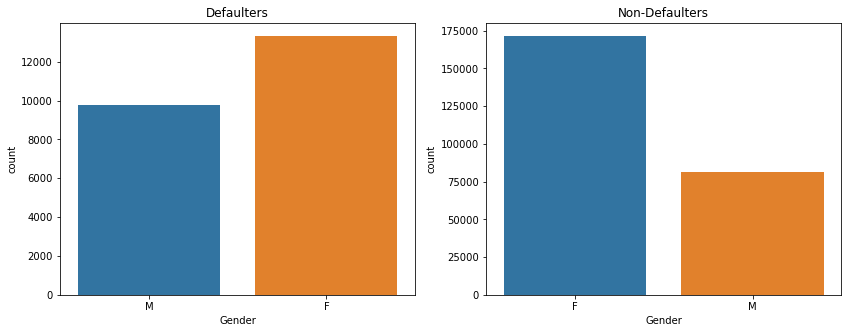

In [60]:
# Plotting two plots for delaulters and non defaulters on basis of gender
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)    
ax = sns.countplot(x = 'CODE_GENDER',data=df_current_target_1)
plt.title('Defaulters')
ax.set(xlabel='Gender')

plt.subplot(1,2,2) 
ax = sns.countplot(x = 'CODE_GENDER',data=df_current_target_0)
plt.title('Non-Defaulters')
ax.set(xlabel='Gender')

##### Analysis
1. **Defaluters** - Nous pouvons constater que les femmes sont légèrement plus nombreuses que les hommes à être en défaut de paiement.
2. **Non-defaluters** - Il en va de même pour les non-défalueurs. Les femelles sont plus nombreuses que les mâles..

### Défaillants et non-défaillants sur la base du type de prêt

[Text(0.5, 0, 'Loan type')]

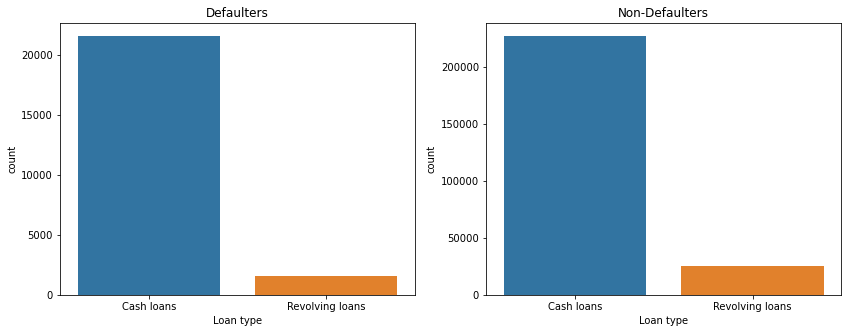

In [61]:
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)    
ax = sns.countplot(x = 'NAME_CONTRACT_TYPE',data=df_current_target_1)
plt.title('Defaulters')
ax.set(xlabel='Loan type')

plt.subplot(1,2,2) 
ax = sns.countplot(x = 'NAME_CONTRACT_TYPE',data=df_current_target_0)
plt.title('Non-Defaulters')
ax.set(xlabel='Loan type')

##### Analysis
Dans les deux cas, on constate que les prêts renouvelables sont très peu nombreux par rapport aux prêts de trésorerie.

#### Defaulters and non-defaulters sur la base du type de revenu

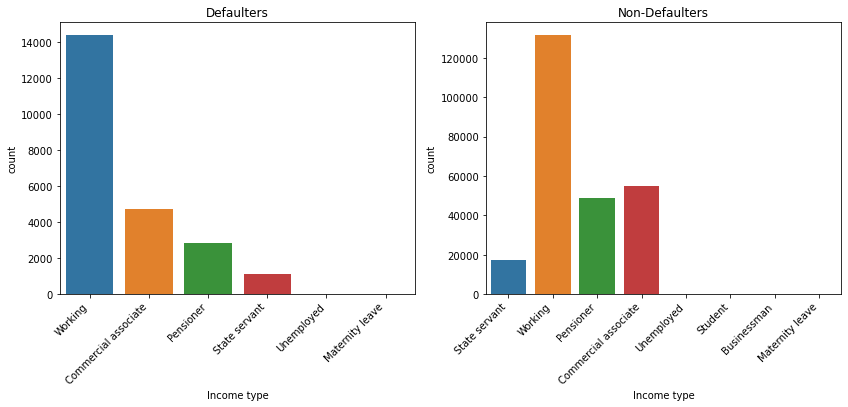

In [62]:
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)    
ax = sns.countplot(x = 'NAME_INCOME_TYPE',data=df_current_target_1)
plt.title('Defaulters')
ax.set(xlabel='Income type')
temp = ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment='right')


plt.subplot(1,2,2) 
ax = sns.countplot(x = 'NAME_INCOME_TYPE',data=df_current_target_0)
plt.title('Non-Defaulters')
ax.set(xlabel='Income type')
temp = ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment='right')

#### Analysis
1. **Defaulters** - Les travailleurs sont le plus souvent en défaut de paiement car leur nombre est élevé par rapport à d'autres professions..
2. **Non-defaulters** - De même, ici aussi, les travailleurs sont plus nombreux à ne pas être en défaut de paiement..

#### Defaulters and non-defaulters on the basis of Education type

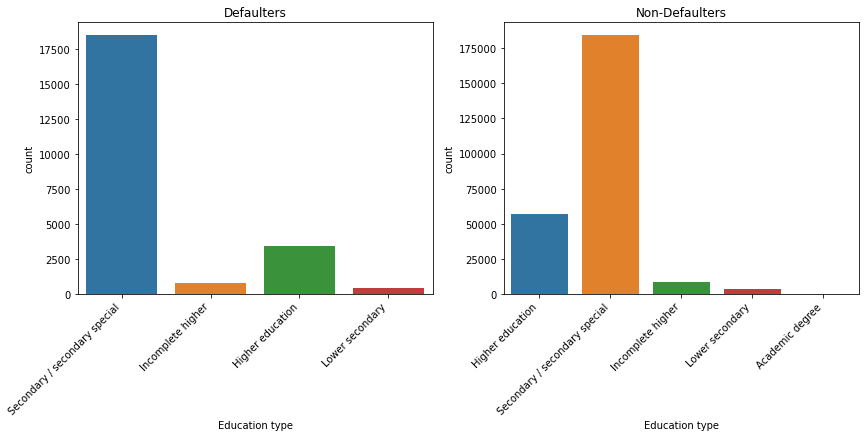

In [63]:
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)    
ax = sns.countplot(x = 'NAME_EDUCATION_TYPE',data=df_current_target_1)
plt.title('Defaulters')
ax.set(xlabel='Education type')
temp = ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment='right')


plt.subplot(1,2,2) 
ax = sns.countplot(x = 'NAME_EDUCATION_TYPE',data=df_current_target_0)
plt.title('Non-Defaulters')
ax.set(xlabel='Education type')
temp = ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment='right')

##### Analysis
1. **Defaulters** - Les clients ayant un niveau d'éducation secondaire sont plus nombreux à être en défaut de paiement que les clients ayant un autre niveau d'éducation..
2. **Non defaulters** - Ici aussi, les écoles secondaires sont plus nombreuses..

#### Defaulters and non-defaulters on the basis of Family status

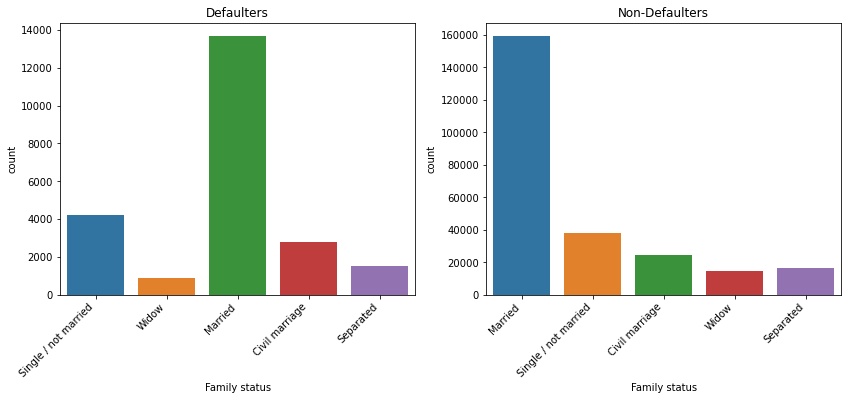

In [64]:
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)    
ax = sns.countplot(x = 'NAME_FAMILY_STATUS',data=df_current_target_1)
plt.title('Defaulters')
ax.set(xlabel='Family status')
temp = ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment='right')


plt.subplot(1,2,2) 
ax = sns.countplot(x = 'NAME_FAMILY_STATUS',data=df_current_target_0)
plt.title('Non-Defaulters')
ax.set(xlabel='Family status')
temp = ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment='right')

##### Analysis
Pour les deux types de clients (défaillants et non défaillants), les personnes mariées sont plus nombreuses que les célibataires, les personnes séparées, les veuves, etc.

### Analyse univariée pour les variables continues

#### Défaillants et non-défaillants sur la base du montant du prêt

<AxesSubplot:title={'center':'Non Defaulters'}, xlabel='AMT_CREDIT', ylabel='Density'>

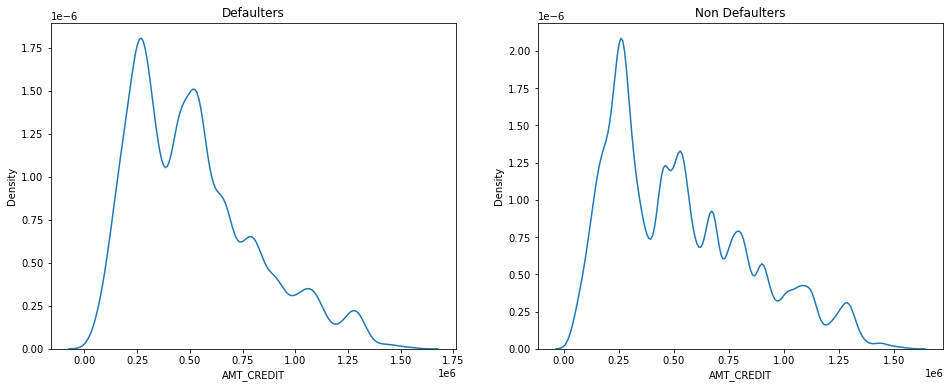

In [65]:
plt.figure(figsize=(16,6))
plt.subplot(1,2,1) 
plt.title('Defaulters')
sns.distplot(df_current_target_1['AMT_CREDIT'],hist=False)

plt.subplot(1,2,2) 
plt.title('Non Defaulters')
sns.distplot(df_current_target_0['AMT_CREDIT'],hist=False)

##### Analysis
1. **Defaulters** - On constate que moins le montant du crédit est élevé, plus le risque de défaillance est important. Le pic se situe jusqu'à 500000.
2. **Non defaulters** - Si le montant du crédit est moins élevé, le risque de défaut de paiement est moindre. Et ce risque diminue progressivement avec le montant du crédit.

#### Defaulters and non-defaulters sur la base du sexe et de leur revenu total

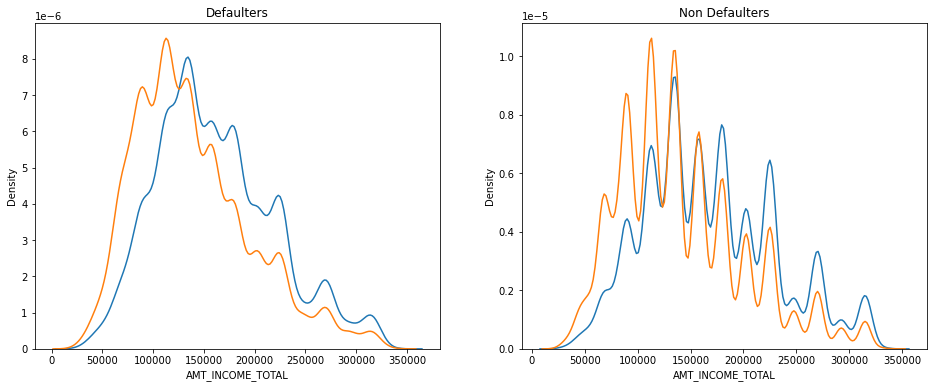

In [66]:
gender = ['M','F']
plt.figure(figsize=(16,6))
plt.subplot(1,2,1) 
plt.title('Defaulters')
for i in gender:
    subset = df_current_target_1[df_current_target_1['CODE_GENDER'] == i]
    sns.distplot(subset['AMT_INCOME_TOTAL'],hist=False,label=i)
    
plt.subplot(1,2,2) 
plt.title('Non Defaulters')
for i in gender:
    subset = df_current_target_0[df_current_target_0['CODE_GENDER'] == i]
    sns.distplot(subset['AMT_INCOME_TOTAL'],hist=False,label=i)
    

##### Analysis
1. **Defaulters** - Nous pouvons remarquer en examinant le schéma que les deux sexes (hommes et femmes) sont presque égaux dans tous les niveaux de revenus. Le pic de défaillance se situe entre 50000 et 200000 euros..
2. **Non defaulters** - Nous observons ici un schéma intéressant. Les femmes sont plus nombreuses à ne pas être en défaut de paiement au niveau des revenus les plus bas, mais elles le sont moins au niveau des revenus les plus élevés. Le pic est plus important pour les deux sexes entre 75000 et 150000.

#### Defaulters and non-defaulters sur la base de l'annuité du prêt

<AxesSubplot:title={'center':'Non Defaulters'}, xlabel='AMT_ANNUITY', ylabel='Density'>

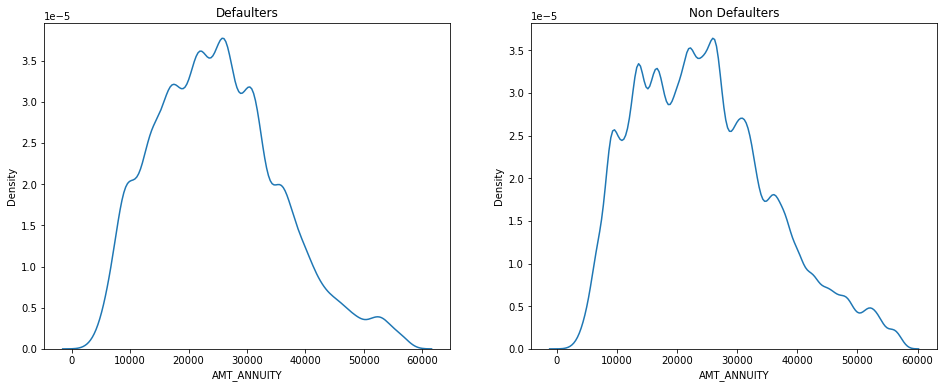

In [67]:
plt.figure(figsize=(16,6))
plt.subplot(1,2,1) 
plt.title('Defaulters')
sns.distplot(df_current_target_1['AMT_ANNUITY'],hist=False)

plt.subplot(1,2,2) 
plt.title('Non Defaulters')
sns.distplot(df_current_target_0['AMT_ANNUITY'],hist=False)

##### Analysis
Le graphique de distribution ci-dessus montre que, dans les deux cas, l'annuité du prêt est plus concentrée entre 10000 et 40000. 

### Analyse univariée segmentée pour les variables catégorielles ordonnées

#### Pourcentage de candidats de la tranche d'âge en defaulted and not defaulted
The analysis below showed that the how much percentage of each age group(Young, Mid age and Senior citizen) applicants are defaulted and not defaulted.

In [68]:
# Taking the percentage of each age group who was defaulted.
# Divide each defaulted age group count by total count of that age group
young_1 = round(100*len(df_application_current[(df_application_current['AGE_GROUP'] == 'Young') & (df_application_current['TARGET'] == 1)])/len(df_application_current[df_application_current['AGE_GROUP'] == 'Young']),2)
midage_1 = round(100*len(df_application_current[(df_application_current['AGE_GROUP'] == 'Mid Age') & (df_application_current['TARGET'] == 1)])/len(df_application_current[df_application_current['AGE_GROUP'] == 'Mid Age']),2)
senior_1 = round(100*len(df_application_current[(df_application_current['AGE_GROUP'] == 'Senior') & (df_application_current['TARGET'] == 1)])/len(df_application_current[df_application_current['AGE_GROUP'] == 'Senior']),2)

In [69]:
# Creating a dataframe of the defaulted age group percentage
agegroup_default = {'AGE_GROUP':['Young', 'Mid Age', 'Senior'], 'Percentage':[young_1, midage_1, senior_1]} 
df_agegroup_default = pd.DataFrame(agegroup_default) 
df_agegroup_default

,AGE_GROUP,Percentage
0,Young,10.79
1,Mid Age,7.37
2,Senior,5.08


In [70]:
# Taking the percentage of each age group who was not defaulted.
# Divide each non defaulted age group count by total count of that age group
young_0 = round(100*len(df_application_current[(df_application_current['AGE_GROUP'] == 'Young') & (df_application_current['TARGET'] == 0)])/len(df_application_current[df_application_current['AGE_GROUP'] == 'Young']),2)
midage_0 = round(100*len(df_application_current[(df_application_current['AGE_GROUP'] == 'Mid Age') & (df_application_current['TARGET'] == 0)])/len(df_application_current[df_application_current['AGE_GROUP'] == 'Mid Age']),2)
senior_0 = round(100*len(df_application_current[(df_application_current['AGE_GROUP'] == 'Senior') & (df_application_current['TARGET'] == 0)])/len(df_application_current[df_application_current['AGE_GROUP'] == 'Senior']),2)

In [71]:
# Creating a dataframe of the non defaulted age group percentage
agegroup_nondefault = {'AGE_GROUP':['Young', 'Mid Age', 'Senior'], 'Percentage':[young_0, midage_0, senior_0]} 
df_agegroup_nondefault = pd.DataFrame(agegroup_nondefault) 
df_agegroup_nondefault

,AGE_GROUP,Percentage
0,Young,89.21
1,Mid Age,92.63
2,Senior,94.92


Text(0.5, 1.0, 'Non-Defaulters')

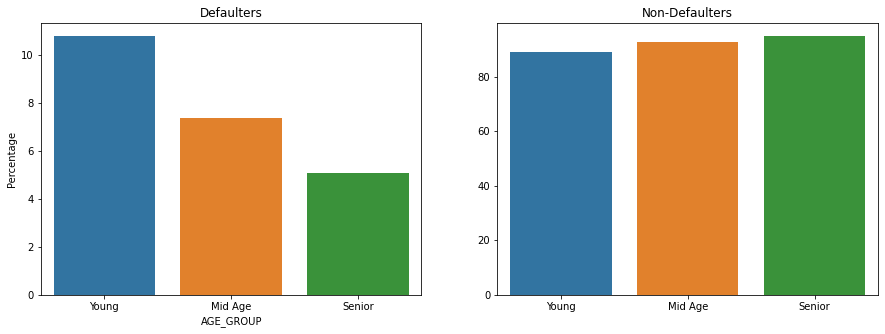

In [72]:
# Plotting the above two dataframes
plt.figure(figsize=(15,5))

plt.subplot(1,2,1) 
sns.barplot(x='AGE_GROUP',y='Percentage',data=df_agegroup_default)
plt.title('Defaulters')

plt.subplot(1,2,2)
sns.barplot(x='AGE_GROUP',y='Percentage',data=agegroup_nondefault)
plt.title('Non-Defaulters')

##### Analysis
1. **Defaulters** - Nous constatons que les jeunes sont plus susceptibles d'être en défaut de paiement que les deux autres groupes d'âge. Les seniors, quant à eux, sont moins susceptibles de se retrouver en défaut de paiement que les autres..
2. **Non defaulters** - Il n'y a pas de grande différence entre les groupes d'âge en ce qui concerne la probabilité de non-défaillance..

#### Groupe de montants de crédit

Text(0.5, 1.0, 'Non-Defaulters')

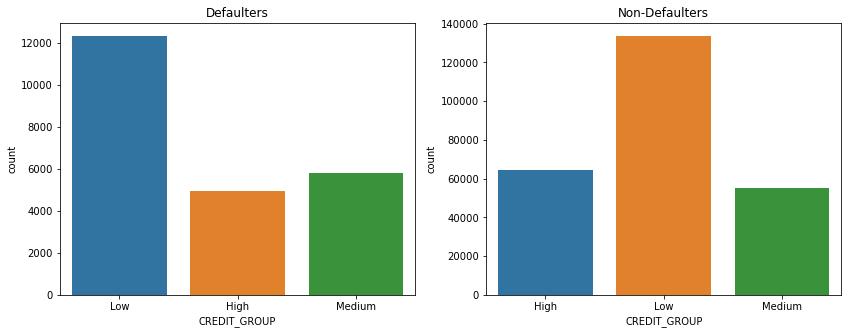

In [73]:
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)    
ax = sns.countplot(x = 'CREDIT_GROUP',data=df_current_target_1)
plt.title('Defaulters')

plt.subplot(1,2,2) 
ax = sns.countplot(x = 'CREDIT_GROUP',data=df_current_target_0)
plt.title('Non-Defaulters')

##### Analysis
1. **Defaulters** - Il est surprenant de constater que les groupes ayant un faible montant crédité sont plus nombreux à être en défaut de paiement..
2. **Non defaulters** - Comme prévu, les groupes ayant un faible montant de crédit sont plus nombreux à ne pas être en défaut de paiement..

#### Groupe de revenus (Income) 

Text(0.5, 1.0, 'Non-Defaulters')

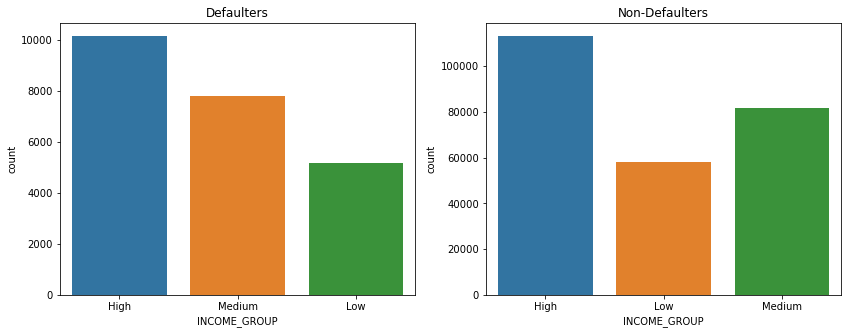

In [74]:
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)    
ax = sns.countplot(x = 'INCOME_GROUP',data=df_current_target_1)
plt.title('Defaulters')

plt.subplot(1,2,2) 
ax = sns.countplot(x = 'INCOME_GROUP',data=df_current_target_0)
plt.title('Non-Defaulters')

##### Analysis
1. **Defaulters** - Il est surprenant de constater que le nombre de défaillances est plus élevé dans le groupe des hauts revenus, que dans celui des revenus moyens et que dans celui des bas revenus..
2. **Non defaulters** - Comme prévu, le nombre de non défaillants est plus élevé dans le groupe à revenu élevé et moins élevé dans le groupe à faible revenu..

#### Score normalisé provenant d'une source de données externe

Text(0.5, 1.0, 'Non-Defaulters')

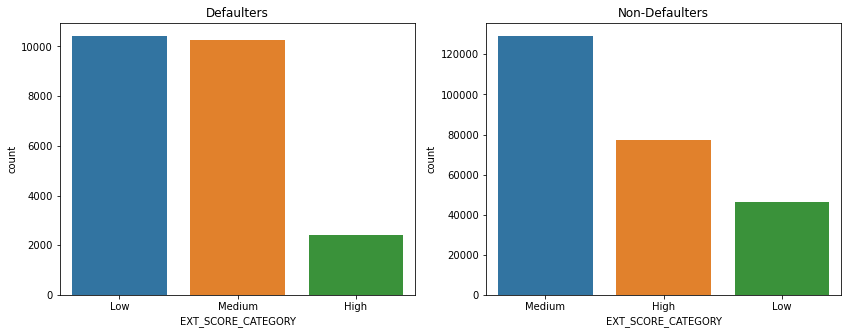

In [75]:
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)    
ax = sns.countplot(x = 'EXT_SCORE_CATEGORY',data=df_current_target_1)
plt.title('Defaulters')

plt.subplot(1,2,2) 
ax = sns.countplot(x = 'EXT_SCORE_CATEGORY',data=df_current_target_0)
plt.title('Non-Defaulters')

##### Analysis
1. **Defaulters** - Il n'est pas surprenant de constater que les mauvais élèves issus de sources de données externes sont plus nombreux à se retrouver en défaut de paiement. De même, les personnes ayant obtenu une note moyenne sont aussi susceptibles d'être en défaut de paiement que les personnes ayant obtenu une note faible..
2. **Non defaulters** - Les personnes ayant un score moyen ne sont pas plus en défaut de paiement que les personnes ayant un score élevé. Comme prévu, les mauvais élèves sont moins nombreux..

## Analyse à plusieurs variables

#### Corrélation des colonnes numériques pertinentes defaulters and non defaulters

In [76]:
# Listing the relevant columns for finding corelation
corr_cols = ['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','AGE','EXT_SOURCE_SCORE','REGION_RATING_CLIENT']

##### Corelation of defaulters 

In [77]:
# Creating dataframe for numerical columns
df_corr_target_1 = df_current_target_1[corr_cols]
df_corr_target_1.head()

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,AGE,EXT_SOURCE_SCORE,REGION_RATING_CLIENT
0,202500.0,406597.5,24700.5,351000.0,26,0.20,2
26,112500.0,979992.0,27076.5,702000.0,52,0.37,3
40,202500.0,1193580.0,35028.0,855000.0,48,0.31,2
42,135000.0,288873.0,16258.5,238500.0,37,0.54,3
81,81000.0,252000.0,14593.5,252000.0,68,0.37,2


In [78]:
# Corelation matrix
df_corr_target_1.corr() 

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,AGE,EXT_SOURCE_SCORE,REGION_RATING_CLIENT
AMT_INCOME_TOTAL,1.000000,0.300536,0.379973,0.300847,-0.017733,0.032894,-0.141908
AMT_CREDIT,0.300536,1.000000,0.743835,0.978326,0.134223,0.101060,-0.037249
AMT_ANNUITY,0.379973,0.743835,1.000000,0.741417,0.002448,0.080166,-0.043304
AMT_GOODS_PRICE,0.300847,0.978326,0.741417,1.000000,0.135488,0.109665,-0.045769
AGE,-0.017733,0.134223,0.002448,0.135488,1.000000,0.166840,-0.035831
EXT_SOURCE_SCORE,0.032894,0.101060,0.080166,0.109665,0.166840,1.000000,-0.168471
REGION_RATING_CLIENT,-0.141908,-0.037249,-0.043304,-0.045769,-0.035831,-0.168471,1.000000


<AxesSubplot:>

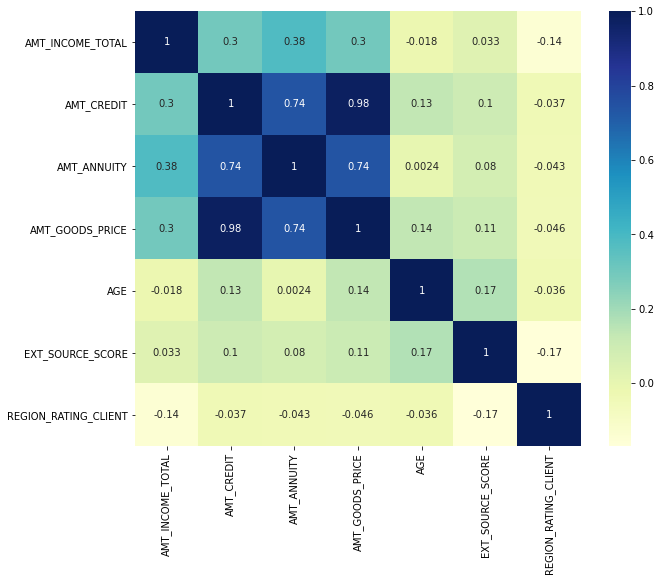

In [79]:
plt.figure(figsize=(10,8))
sns.heatmap(df_corr_target_1.corr(),cmap="YlGnBu",annot=True)

**Highly corelate columns for defaulters**
1. AMT_CREDIT and AMT_ANNUITY (0.74)
2. AMT_CREDIT and AMT_GOODS_PRICE (0.98)
3. AMT_ANNUITY and AMT_GOODS_PRICE (0.74)

##### Corelation of non defaulters 

In [80]:
# Creating dataframe for numerical columns
df_corr_target_0 = df_current_target_0[corr_cols]
df_corr_target_0.head()

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,AGE,EXT_SOURCE_SCORE,REGION_RATING_CLIENT
1,270000.0,1293502.5,35698.5,1129500.0,46,0.57,1
2,67500.0,135000.0,6750.0,135000.0,53,0.64,2
3,135000.0,312682.5,29686.5,297000.0,53,0.58,2
4,121500.0,513000.0,21865.5,513000.0,55,0.42,2
5,99000.0,490495.5,27517.5,454500.0,47,0.49,2


In [81]:
# Corelation matrix
df_corr_target_0.corr() 

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,AGE,EXT_SOURCE_SCORE,REGION_RATING_CLIENT
AMT_INCOME_TOTAL,1.000000,0.325569,0.404494,0.328675,-0.100555,0.042235,-0.173463
AMT_CREDIT,0.325569,1.000000,0.762762,0.982246,0.047798,0.075219,-0.047222
AMT_ANNUITY,0.404494,0.762762,1.000000,0.762543,-0.022907,0.067825,-0.077640
AMT_GOODS_PRICE,0.328675,0.982246,0.762543,1.000000,0.046119,0.082473,-0.049075
AGE,-0.100555,0.047798,-0.022907,0.046119,1.000000,0.173142,-0.004739
EXT_SOURCE_SCORE,0.042235,0.075219,0.067825,0.082473,0.173142,1.000000,-0.201100
REGION_RATING_CLIENT,-0.173463,-0.047222,-0.077640,-0.049075,-0.004739,-0.201100,1.000000


<AxesSubplot:>

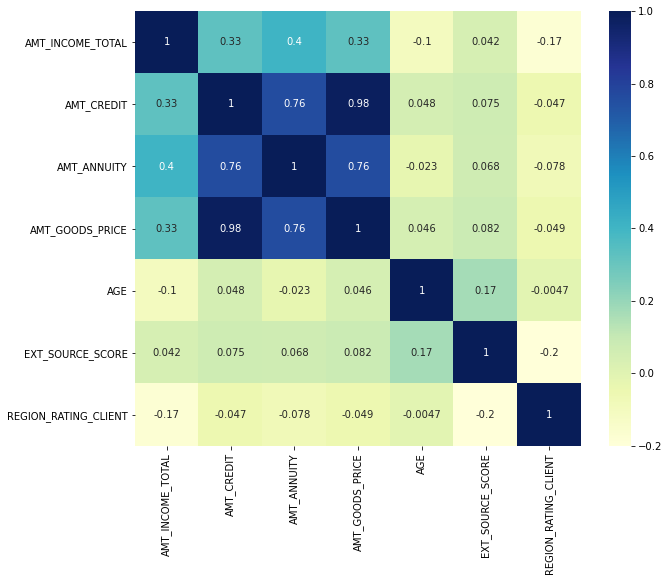

In [82]:
plt.figure(figsize=(10,8))
sns.heatmap(df_corr_target_0.corr(),cmap="YlGnBu",annot=True)

**Highly corelate columns for non defaulters**
1. AMT_CREDIT and AMT_ANNUITY (0.76)
2. AMT_CREDIT and AMT_GOODS_PRICE (0.98)
3. AMT_ANNUITY and AMT_GOODS_PRICE (0.76)


**Conclusion** - 
Nous pouvons constater que les mêmes paires de colonnes sont fortement corrélées, tant pour les defaulters and non defaulters.

### Bivariate analysis on continious variable

#### Credit amount of the loan on the basis of client income for both male and female

Text(0.5, 1.0, 'Non Defaulters')

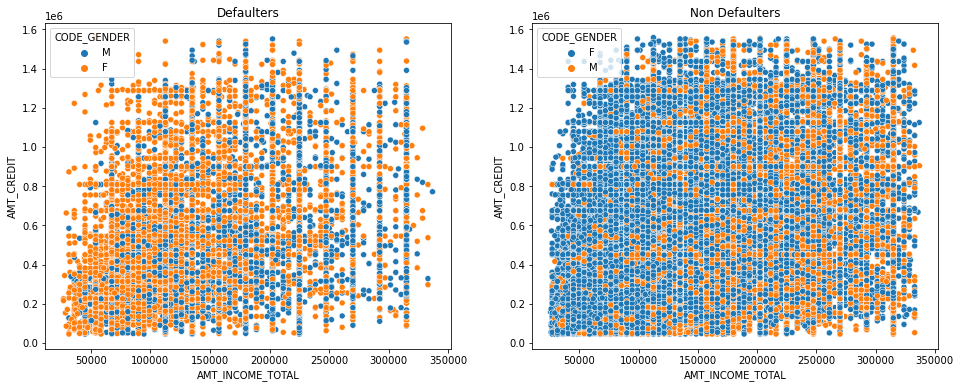

In [83]:
plt.figure(figsize=(16,6))

plt.subplot(1,2,1)
ax = sns.scatterplot('AMT_INCOME_TOTAL','AMT_CREDIT',hue='CODE_GENDER', data=df_current_target_1)
plt.title('Defaulters')

plt.subplot(1,2,2)
ax = sns.scatterplot('AMT_INCOME_TOTAL','AMT_CREDIT',hue = 'CODE_GENDER', data=df_current_target_0)
plt.title('Non Defaulters')

##### Analysis
1. **Defaulters** - We can slightly figure out that the values are more concentrated on the lower income and lower credit of the loan. That means as the income is increased, the amount of loan is also increased. This is true for both the genders.
2. **Non defaulters** - We can hardly figure out any pattern out of this.

#### Credit amount of the loan on the basis of Number of enquiries to Credit Bureau about the client

Text(0.5, 1.0, 'Non Defaulters')

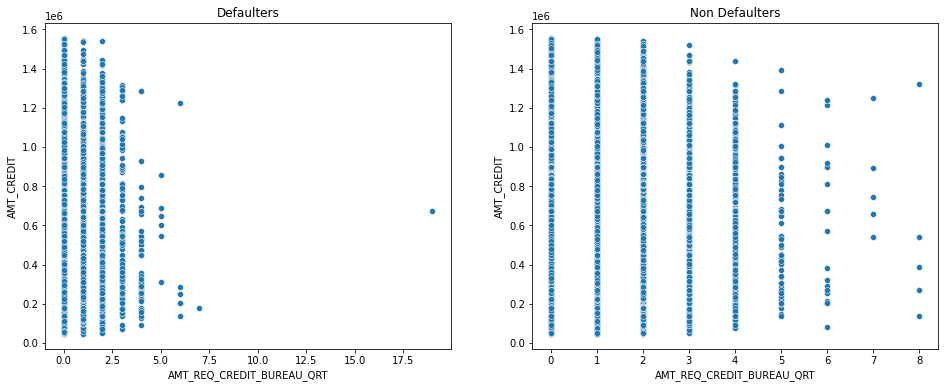

In [84]:
plt.figure(figsize=(16,6))

plt.subplot(1,2,1)
ax = sns.scatterplot('AMT_REQ_CREDIT_BUREAU_QRT','AMT_CREDIT', data=df_current_target_1)
plt.title('Defaulters')

plt.subplot(1,2,2)
ax = sns.scatterplot('AMT_REQ_CREDIT_BUREAU_QRT','AMT_CREDIT', data=df_current_target_0)
plt.title('Non Defaulters')

##### Analysis
Nous constatons que plus le nombre de demandes est élevé, moins le montant du crédit est élevé defaulters and non defaulters.

### Bivariate analysis on categorical variable

#### Montant du crédit des différentes catégories de prêts

In [85]:
# Category list
categories = ['NAME_CONTRACT_TYPE','CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE',
             'NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','AGE_GROUP','INCOME_GROUP','EXT_SCORE_CATEGORY']

#### Defaulters

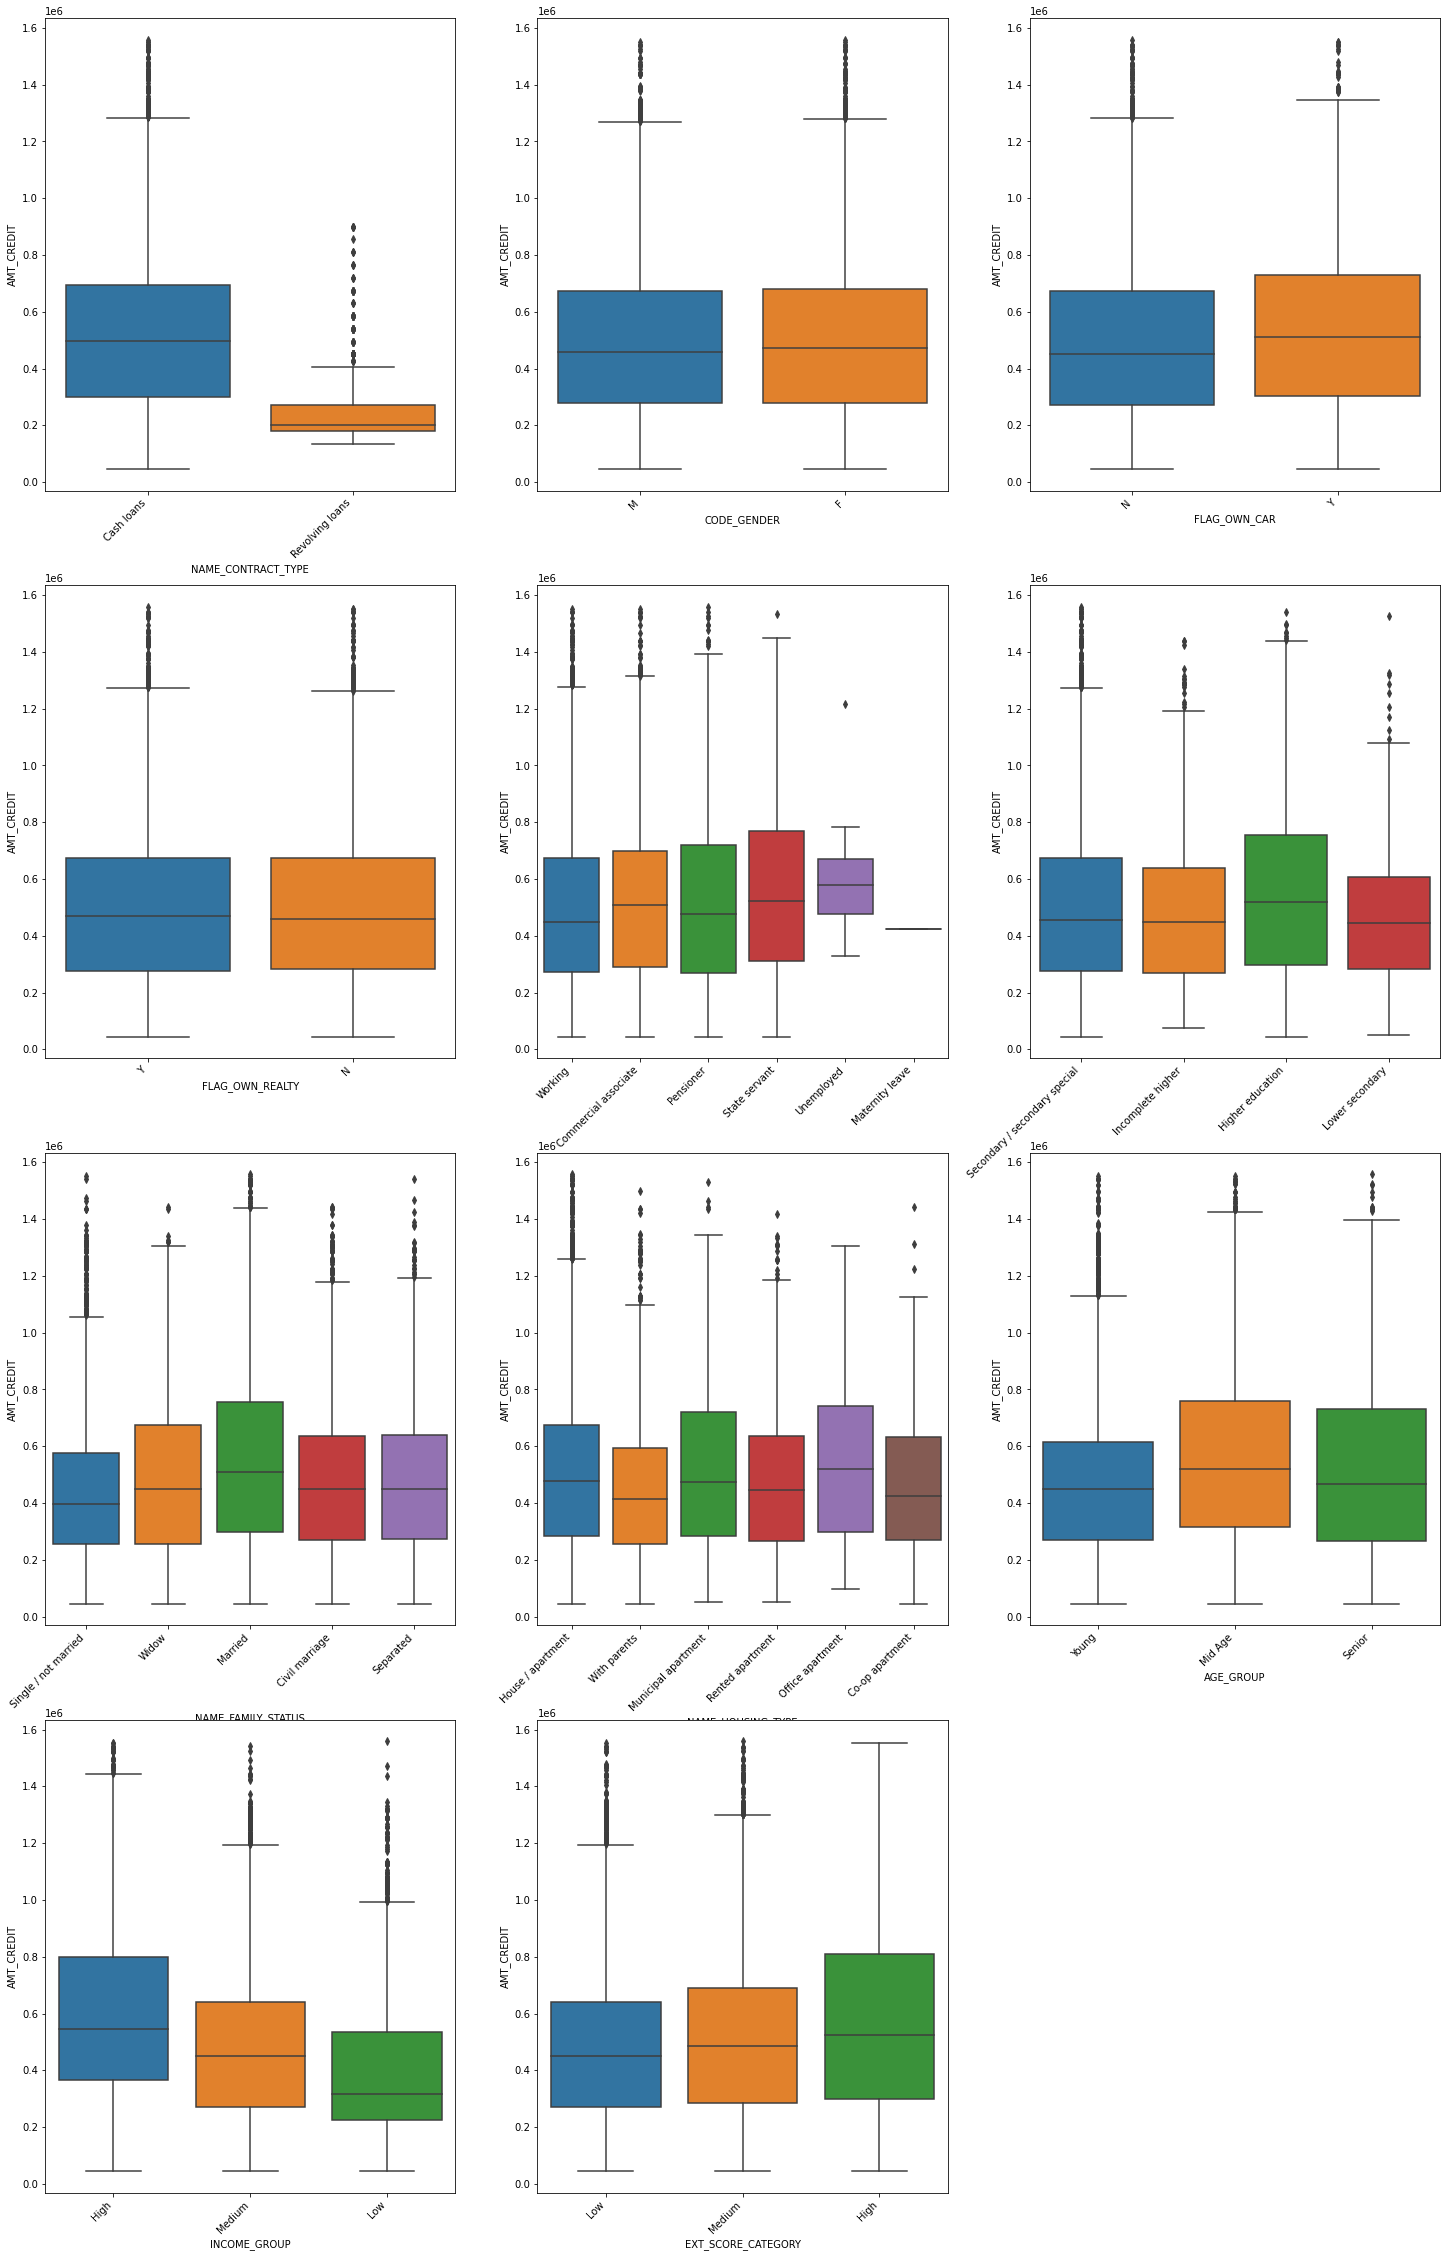

In [86]:
plt.figure(figsize=(25,40))
k=0
for category in categories:
    k = k+1
    ax = plt.subplot(4,3,k)
    sns.boxplot(x = category, y = 'AMT_CREDIT', data=df_current_target_1)
    temp = ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment='right')

##### Analysis
1. Le montant des prêts est très faible pour les "prêts renouvelables".
2. Il n'y a pas de différence de montant de crédit entre les sexes, les clients possédant une voiture ou un bien immobilier.
3. Le groupe des jeunes a obtenu un montant de crédit inférieur à celui des personnes d'âge moyen et des personnes âgées.
4. Le groupe à revenu élevé bénéficie d'un montant de crédit plus élevé.
5. Les clients ayant un score externe plus élevé ont un montant de prêt plus élevé

#### Non-defaulters

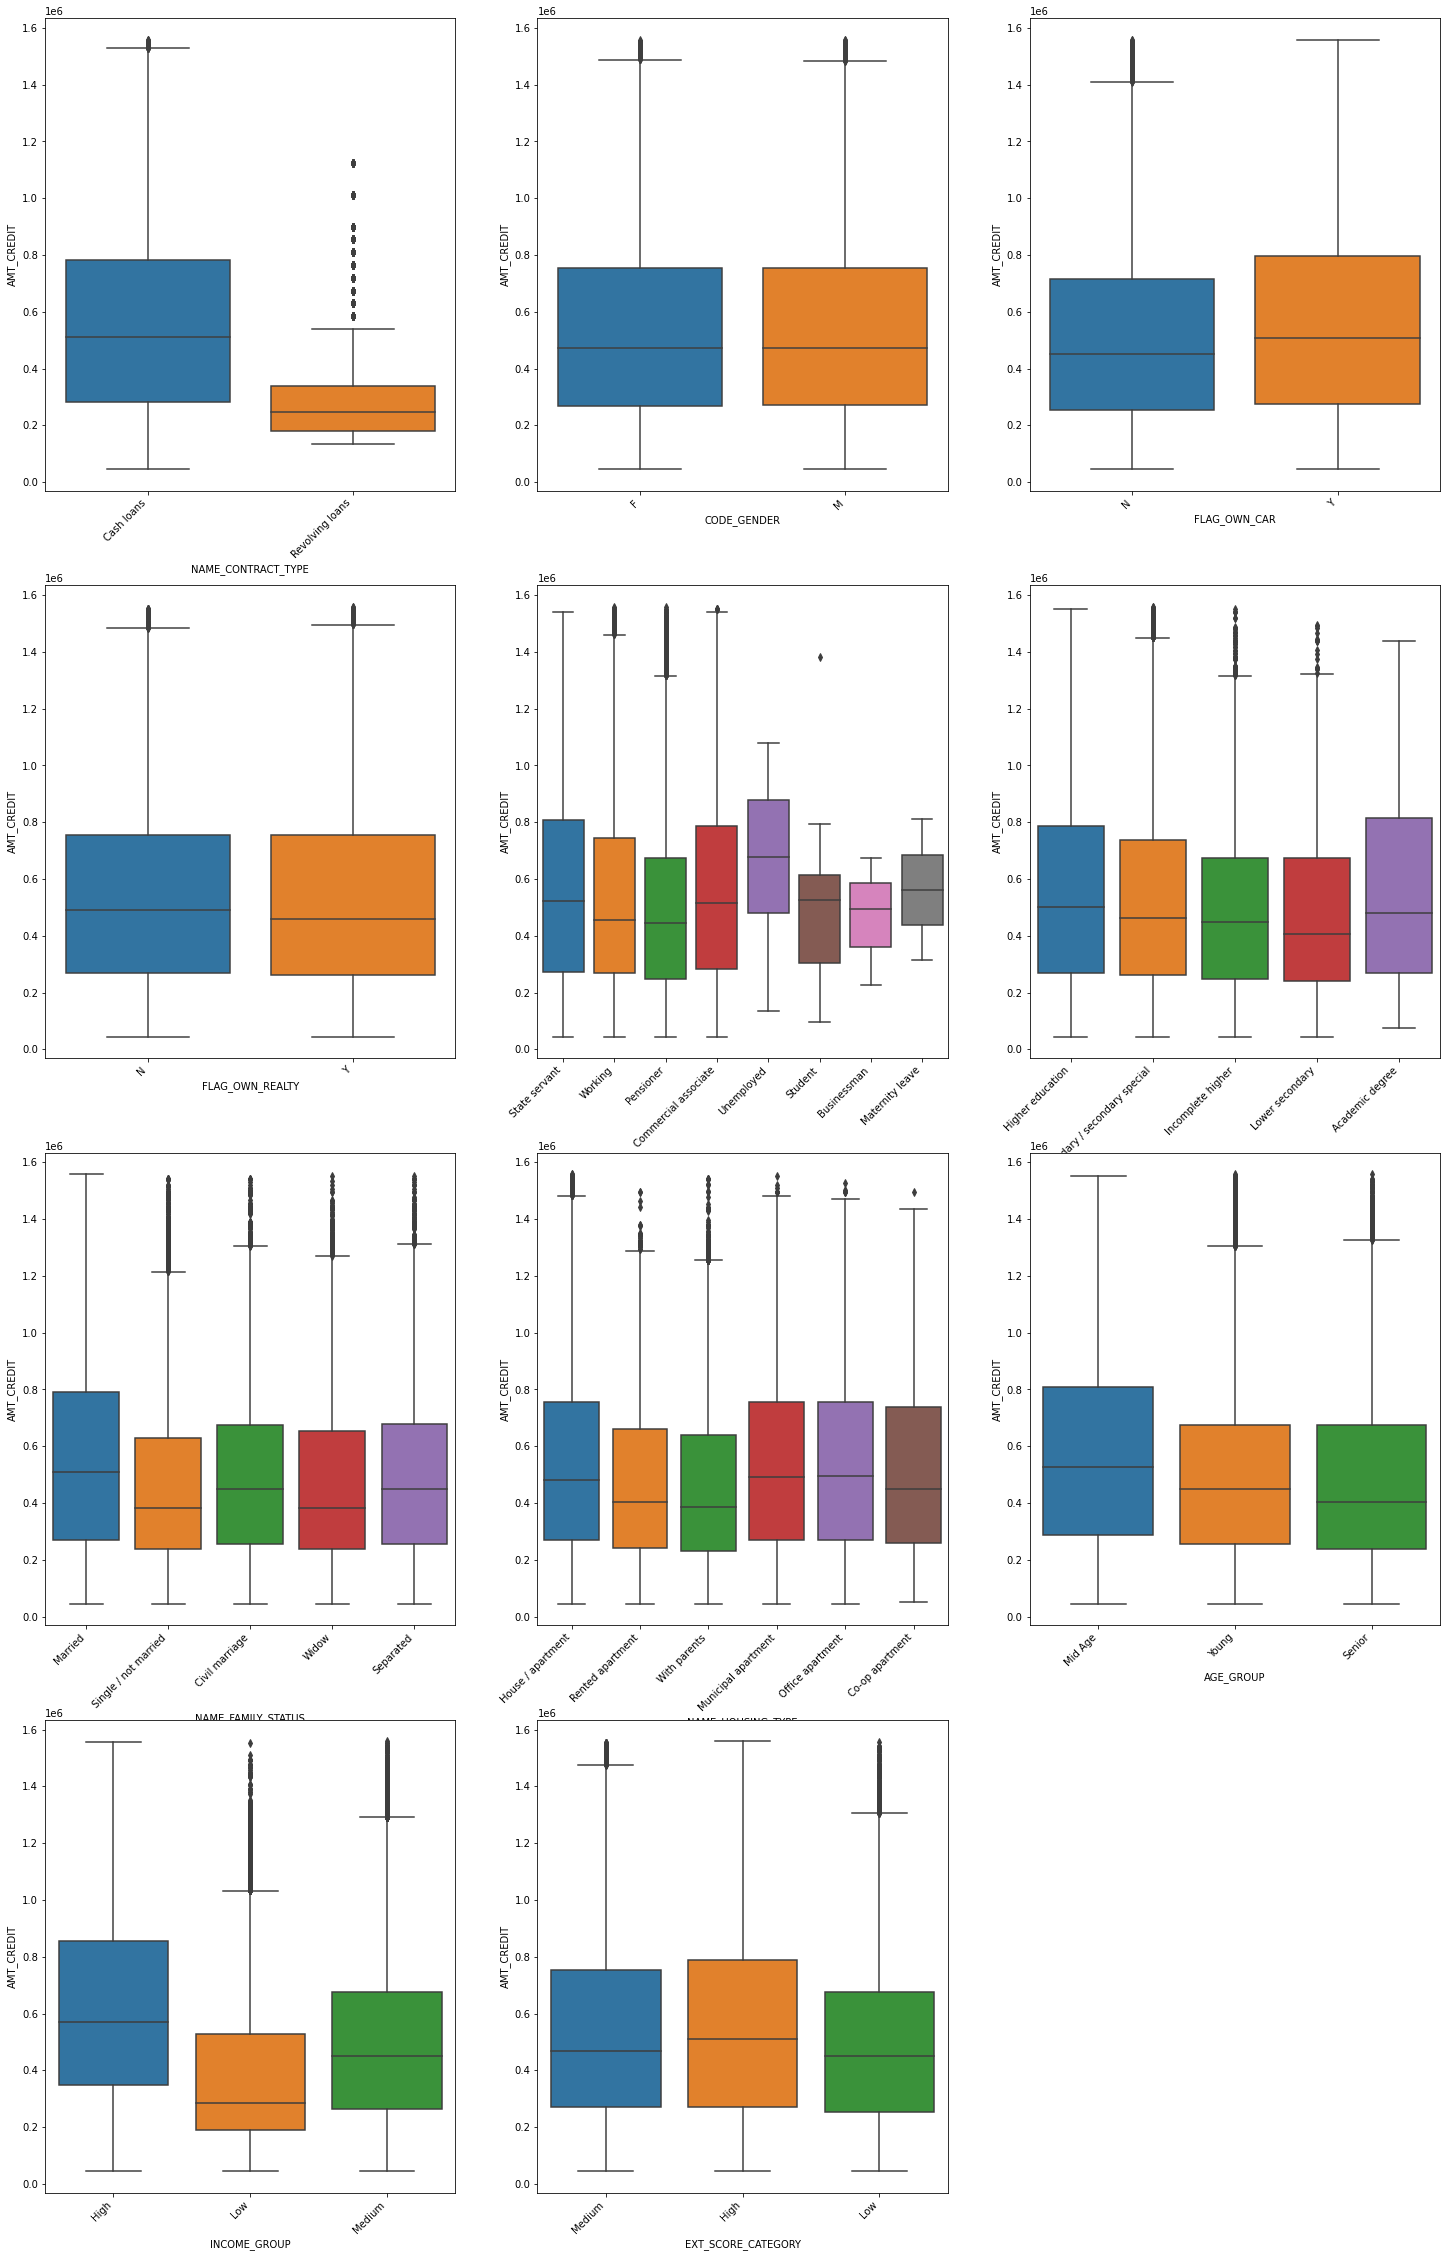

In [87]:
plt.figure(figsize=(25,40))
k=0
for category in categories:
    k = k+1
    ax = plt.subplot(4,3,k)
    sns.boxplot(x = category, y = 'AMT_CREDIT', data=df_current_target_0)
    temp = ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment='right')

##### Analysis
1. Le montant des prêts est très faible pour les "prêts renouvelables".
2. Il n'y a pas de différence de montant de crédit entre les sexes, les clients possédant une voiture ou un bien immobilier.
3. Le groupe d'âge moyen a obtenu un montant de crédit plus élevé que les jeunes et les personnes âgées.
4. Le groupe à revenu élevé a un montant de crédit plus élevé et le groupe à faible revenu un montant plus faible.
5. Les clients ayant un score externe plus élevé ont un montant de prêt plus important.

### Analysis of two segmented variables 

#### Groupe de revenu et sexe

Text(0, 0.5, 'Defaulters')

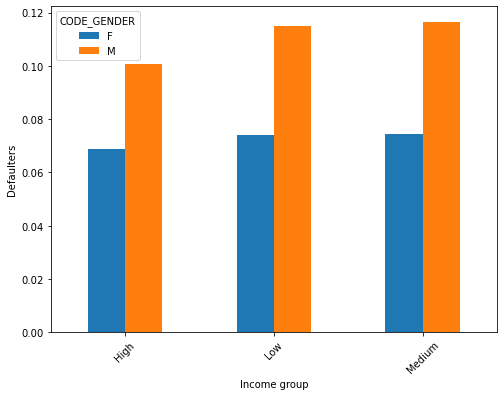

In [88]:
df_application_current.pivot_table(values='TARGET',index='INCOME_GROUP',columns='CODE_GENDER',aggfunc='mean').plot.bar(figsize=(8,6),rot=45)
plt.xlabel('Income group')
plt.ylabel('Defaulters')

##### Analysis
Nous pouvons constater que les hommes sont plus susceptibles d'être en défaut de paiement que les femmes dans toutes les catégories de revenus.

#### Education and gender

Text(0, 0.5, 'Defaulters')

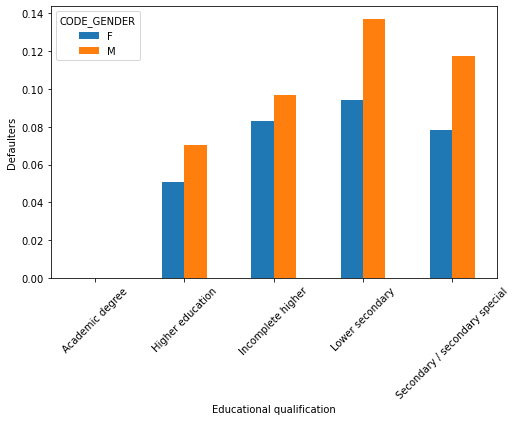

In [89]:
df_application_current.pivot_table(values='TARGET',index='NAME_EDUCATION_TYPE',columns='CODE_GENDER',aggfunc='mean').plot.bar(figsize=(8,5),rot=45)
plt.xlabel('Educational qualification')
plt.ylabel('Defaulters')

##### Analysis
1. Les clients ayant fait des études secondaires inférieures sont les plus nombreux à être en défaut de paiement, suivis des clients ayant fait des études secondaires et des clients ayant fait des études supérieures incomplètes.
2. Les personnes ayant un niveau d'éducation supérieur sont moins en défaut de paiement.
3. Quel que soit le niveau d'éducation, les femmes sont moins défaillantes que les hommes.

 #### Groupe de montants de crédit et groupe de revenus

Text(0, 0.5, 'Defaulters')

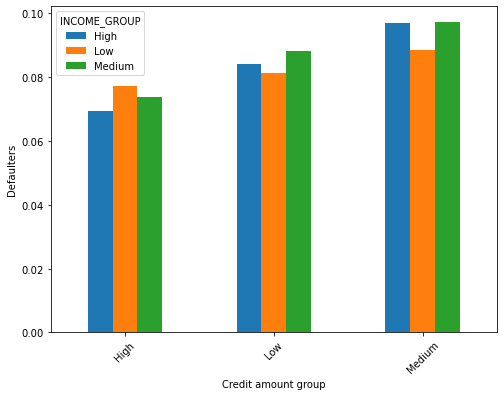

In [90]:
df_application_current.pivot_table(values='TARGET',index='CREDIT_GROUP',columns='INCOME_GROUP',aggfunc='mean').plot.bar(figsize=(8,6),rot=45)
plt.xlabel('Credit amount group')
plt.ylabel('Defaulters')

##### Analysis
1. Le groupe des crédits d'un montant moyen présente un taux de défaillance élevé dans toutes les catégories de revenus.
2. Les groupes ayant un montant de crédit élevé sont moins susceptibles d'être en défaut de paiement dans toutes les catégories de revenus.

#### Credit amount group and Age group

Text(0, 0.5, 'Defaulters')

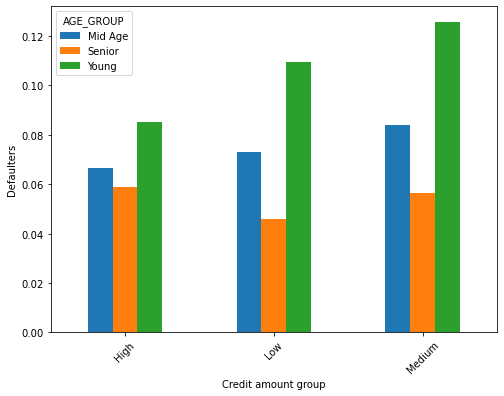

In [91]:
df_application_current.pivot_table(values='TARGET',index='CREDIT_GROUP',columns='AGE_GROUP',aggfunc='mean').plot.bar(figsize=(8,6),rot=45)
plt.xlabel('Credit amount group')
plt.ylabel('Defaulters')

##### Analysis
1. Les jeunes clients dont le montant du crédit est moyen ou faible ont un taux de défaillance élevé.
2. Les seniors, quel que soit le montant de leur crédit, sont moins susceptibles d'être en défaut de paiement.

#### Groupe d'âge et groupe de revenu

Text(0, 0.5, 'Defaulters')

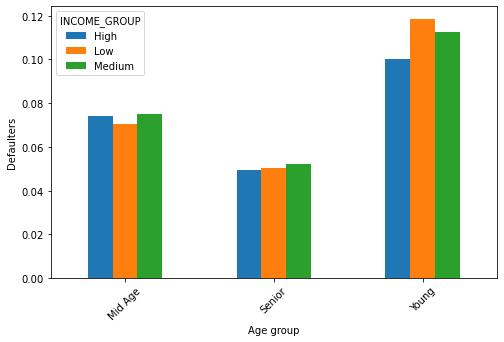

In [92]:
df_application_current.pivot_table(values='TARGET',index='AGE_GROUP',columns='INCOME_GROUP',aggfunc='mean').plot.bar(figsize=(8,5),rot=45)
plt.xlabel('Age group')
plt.ylabel('Defaulters')

##### Analysis
1. Les jeunes clients sont plus souvent en défaut de paiement que les personnes d'âge moyen et les personnes âgées.
2. Les jeunes à faibles revenus sont plus souvent en défaut de paiement.
3. Pour les personnes d'âge moyen et les personnes âgées, le taux de défaillance est pratiquement le même dans toutes les catégories de revenus.

#### Profession and Gender

Text(0, 0.5, 'Defaulters')

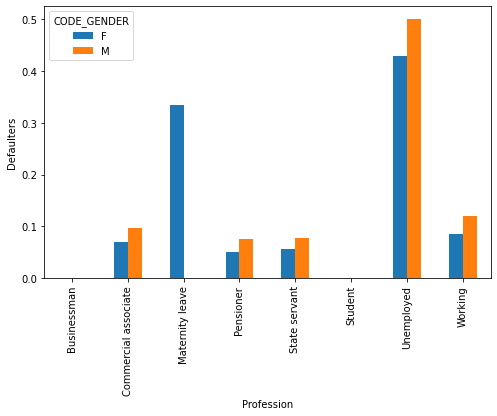

In [93]:
df_application_current.pivot_table(values='TARGET',index='NAME_INCOME_TYPE',columns='CODE_GENDER',aggfunc='mean').plot.bar(figsize=(8,5),rot=90)
plt.xlabel('Profession')
plt.ylabel('Defaulters')

##### Analysis
1. Il n'est pas surprenant que les clients sans emploi soient plus souvent en défaut de paiement.
2. On s'attend à ce que les clientes en congé de maternité soient davantage en défaut de paiement.
3. Le taux de défaillance est inférieur dans toutes les autres professions.
4. Les hommes sont davantage en défaut dans leurs professions respectives que les femmes.

#### Family status and age group

Text(0, 0.5, 'Defaulters')

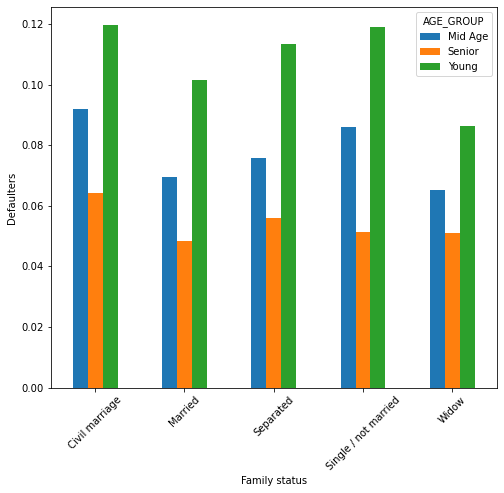

In [94]:
df_application_current.pivot_table(values='TARGET',index='NAME_FAMILY_STATUS',columns='AGE_GROUP',aggfunc='mean').plot.bar(figsize=(8,7),rot=45)
plt.xlabel('Family status')
plt.ylabel('Defaulters')

##### Analysis
Quelle que soit la situation familiale, les clients "jeunes" sont plus souvent en défaut de paiement et les "seniors" le sont moins.

#### Family status and gender

Text(0, 0.5, 'Defaulters')

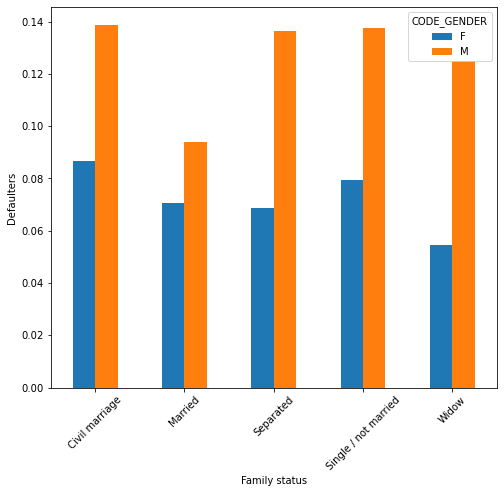

In [95]:
df_application_current.pivot_table(values='TARGET',index='NAME_FAMILY_STATUS',columns='CODE_GENDER',aggfunc='mean').plot.bar(figsize=(8,7),rot=45)
plt.xlabel('Family status')
plt.ylabel('Defaulters')

##### Analysis
Quelle que soit la situation familiale, les clients masculins sont plus souvent en défaut de paiement que les clients féminins.

# Previous application

In [96]:
df_application_previous = pd.read_csv('/kaggle/input/loan-defaulter/previous_application.csv')
df_application_previous.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [97]:
df_application_previous.shape

(1670214, 37)

In [98]:
df_application_previous.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [99]:
df_application_previous.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.670214e+06,1.670214e+06,1.297979e+06,1.670214e+06,1.670213e+06,7.743700e+05,1.284699e+06,1.670214e+06,1.670214e+06,774370.000000,5951.000000,5951.000000,1.670214e+06,1.670214e+06,1.297984e+06,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000
mean,1.923089e+06,2.783572e+05,1.595512e+04,1.752339e+05,1.961140e+05,6.697402e+03,2.278473e+05,1.248418e+01,9.964675e-01,0.079637,0.188357,0.773503,-8.806797e+02,3.139511e+02,1.605408e+01,342209.855039,13826.269337,33767.774054,76582.403064,81992.343838,0.332570
std,5.325980e+05,1.028148e+05,1.478214e+04,2.927798e+05,3.185746e+05,2.092150e+04,3.153966e+05,3.334028e+00,5.932963e-02,0.107823,0.087671,0.100879,7.790997e+02,7.127443e+03,1.456729e+01,88916.115834,72444.869708,106857.034789,149647.415123,153303.516729,0.471134
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,-9.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-0.000015,0.034781,0.373150,-2.922000e+03,-1.000000e+00,0.000000e+00,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000
25%,1.461857e+06,1.893290e+05,6.321780e+03,1.872000e+04,2.416050e+04,0.000000e+00,5.084100e+04,1.000000e+01,1.000000e+00,0.000000,0.160716,0.715645,-1.300000e+03,-1.000000e+00,6.000000e+00,365243.000000,-1628.000000,-1242.000000,-1314.000000,-1270.000000,0.000000
50%,1.923110e+06,2.787145e+05,1.125000e+04,7.104600e+04,8.054100e+04,1.638000e+03,1.123200e+05,1.200000e+01,1.000000e+00,0.051605,0.189122,0.835095,-5.810000e+02,3.000000e+00,1.200000e+01,365243.000000,-831.000000,-361.000000,-537.000000,-499.000000,0.000000
75%,2.384280e+06,3.675140e+05,2.065842e+04,1.803600e+05,2.164185e+05,7.740000e+03,2.340000e+05,1.500000e+01,1.000000e+00,0.108909,0.193330,0.852537,-2.800000e+02,8.200000e+01,2.400000e+01,365243.000000,-411.000000,129.000000,-74.000000,-44.000000,1.000000
max,2.845382e+06,4.562550e+05,4.180581e+05,6.905160e+06,6.905160e+06,3.060045e+06,6.905160e+06,2.300000e+01,1.000000e+00,1.000000,1.000000,1.000000,-1.000000e+00,4.000000e+06,8.400000e+01,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


#### Traitement des valeurs manquantes dans les colonnes

 **Remplacement de tous les XNA et XAP vers np.null**
Parce qu'il semble que ces valeurs saisies dans l'application sont vides ou ne s'appliquent pas.

In [100]:
df_application_previous.replace('XNA',np.nan,inplace=True)
df_application_previous.replace('XAP',np.nan,inplace=True)

In [101]:
# List the columns having more than 30% missing values
cols_30_percent_missing_values = (df_application_previous.columns[(round(100*(df_application_previous.isnull().sum()/len(df_application_previous.index)), 2)) >= 30]).tolist()
cols_30_percent_missing_values

['AMT_DOWN_PAYMENT',
 'RATE_DOWN_PAYMENT',
 'RATE_INTEREST_PRIMARY',
 'RATE_INTEREST_PRIVILEGED',
 'NAME_CASH_LOAN_PURPOSE',
 'NAME_PAYMENT_TYPE',
 'CODE_REJECT_REASON',
 'NAME_TYPE_SUITE',
 'NAME_GOODS_CATEGORY',
 'NAME_PRODUCT_TYPE',
 'NAME_SELLER_INDUSTRY',
 'NAME_YIELD_GROUP',
 'DAYS_FIRST_DRAWING',
 'DAYS_FIRST_DUE',
 'DAYS_LAST_DUE_1ST_VERSION',
 'DAYS_LAST_DUE',
 'DAYS_TERMINATION',
 'NFLAG_INSURED_ON_APPROVAL']

In [102]:
# Delete the columns having more than 30% missing values
df_application_previous = df_application_previous.drop(cols_30_percent_missing_values,axis=1)

 #### Lister et supprimer les colonnes qui ne sont pas pertinentes pour l'analyse.

In [103]:
df_application_previous.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_GOODS_PRICE',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'NAME_CONTRACT_STATUS', 'DAYS_DECISION', 'NAME_CLIENT_TYPE',
       'NAME_PORTFOLIO', 'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'CNT_PAYMENT',
       'PRODUCT_COMBINATION'],
      dtype='object')

In [104]:
cols_irrelevant = ['HOUR_APPR_PROCESS_START','FLAG_LAST_APPL_PER_CONTRACT','NFLAG_LAST_APPL_IN_DAY','WEEKDAY_APPR_PROCESS_START']

In [105]:
# # Supprimer les colonnes qui ne sont pas pertinentes pour l'analyse
df_application_previous = df_application_previous.drop(cols_irrelevant,axis=1)

In [106]:
df_application_previous.shape

(1670214, 15)

#### Traitement des valeurs manquantes dans les lignes

In [107]:
# Comptez le nombre de lignes ayant plus de 50 % de valeurs manquantes.
# Comme il n'y a pas de lignes, nous ne supprimons pas de lignes sur la base de ceci
len(df_application_previous[df_application_previous.isnull().sum(axis=1) > (len(df_application_previous.columns)//2)].index)

0

In [108]:
# Pourcentage de valeurs manquantes dans les colonnes
(round(100*(df_application_previous.isnull().sum()/len(df_application_previous.index)),2))

SK_ID_PREV               0.00
SK_ID_CURR               0.00
NAME_CONTRACT_TYPE       0.02
AMT_ANNUITY             22.29
AMT_APPLICATION          0.00
AMT_CREDIT               0.00
AMT_GOODS_PRICE         23.08
NAME_CONTRACT_STATUS     0.00
DAYS_DECISION            0.00
NAME_CLIENT_TYPE         0.12
NAME_PORTFOLIO          22.29
CHANNEL_TYPE             0.00
SELLERPLACE_AREA         0.00
CNT_PAYMENT             22.29
PRODUCT_COMBINATION      0.02
dtype: float64

In [109]:
# Comptez les lignes pour lesquelles AMT_ANNUITY, AMT_GOODS_PRICE et CNT_PAYMENT sont toutes vides.
len(df_application_previous[np.isnan(df_application_previous['AMT_ANNUITY']) & np.isnan(df_application_previous['CNT_PAYMENT']) & np.isnan(df_application_previous['AMT_GOODS_PRICE'])])

333855

Comme il n'y a que 333855 enregistrements de ce type, nous pouvons les supprimer.
Note:- Comme nous avons un total de 1670214 enregistrements, la suppression de seulement 333855 enregistrements n'affectera pas beaucoup la suite de l'analyse.
Il est préférable de supprimer ces lignes plutôt que d'imputer des valeurs et de fausser l'analyse.

In [110]:
df_application_previous = df_application_previous[(~(np.isnan(df_application_previous['AMT_ANNUITY']) & np.isnan(df_application_previous['AMT_GOODS_PRICE']) & np.isnan(df_application_previous['CNT_PAYMENT'])))]

In [111]:
df_application_previous.shape

(1336359, 15)

In [112]:
(round(100*(df_application_previous.isnull().sum()/len(df_application_previous.index)),2))

SK_ID_PREV              0.00
SK_ID_CURR              0.00
NAME_CONTRACT_TYPE      0.00
AMT_ANNUITY             2.87
AMT_APPLICATION         0.00
AMT_CREDIT              0.00
AMT_GOODS_PRICE         3.87
NAME_CONTRACT_STATUS    0.00
DAYS_DECISION           0.00
NAME_CLIENT_TYPE        0.07
NAME_PORTFOLIO          2.87
CHANNEL_TYPE            0.00
SELLERPLACE_AREA        0.00
CNT_PAYMENT             2.87
PRODUCT_COMBINATION     0.00
dtype: float64

In [113]:
# Compter les lignes pour lesquelles AMT_ANNUITY est vide 
len(df_application_previous[np.isnan(df_application_previous['AMT_ANNUITY'])])

38380

In [114]:
# Comme il n'y a que 38380 lignes, nous pouvons supprimer ces enregistrements
df_application_previous = df_application_previous[~(np.isnan(df_application_previous['AMT_ANNUITY']))]

In [115]:
df_application_previous.shape

(1297979, 15)

In [116]:
(round(100*(df_application_previous.isnull().sum()/len(df_application_previous.index)),2))

SK_ID_PREV              0.00
SK_ID_CURR              0.00
NAME_CONTRACT_TYPE      0.00
AMT_ANNUITY             0.00
AMT_APPLICATION         0.00
AMT_CREDIT              0.00
AMT_GOODS_PRICE         3.98
NAME_CONTRACT_STATUS    0.00
DAYS_DECISION           0.00
NAME_CLIENT_TYPE        0.07
NAME_PORTFOLIO          0.00
CHANNEL_TYPE            0.00
SELLERPLACE_AREA        0.00
CNT_PAYMENT             0.00
PRODUCT_COMBINATION     0.00
dtype: float64

In [117]:
df_application_previous.shape

(1297979, 15)

### Removing outliers

In [118]:
# Finding outliers in all the numerical columns with 1.5 IQR rule and removing the outlier records 
col_list_outlier = ['AMT_ANNUITY','AMT_APPLICATION','AMT_CREDIT','AMT_GOODS_PRICE','DAYS_DECISION','CNT_PAYMENT']
for col in col_list_outlier: 
    q1 = df_application_previous[col].quantile(0.25)
    q3 = df_application_previous[col].quantile(0.75)
    iqr = q3-q1
    range_low  = q1-1.5*iqr
    range_high = q3+1.5*iqr
    df_application_prev = df_application_previous.loc[(df_application_previous[col] > range_low) & (df_application_previous[col] < range_high)]

df_application_prev.shape

(1242076, 15)

In [119]:
# Percentage of rows lost
round((100 - 100*(len(df_application_prev.index)/1670214)),2)

25.63

Dans notre exercice de nettoyage des données, nous avons perdu environ `25%` de lignes. Comme il s'agit d'un énorme ensemble de données, nous avons encore 1242076 enregistrements à analyser.

### Vérifier le déséquilibre des données

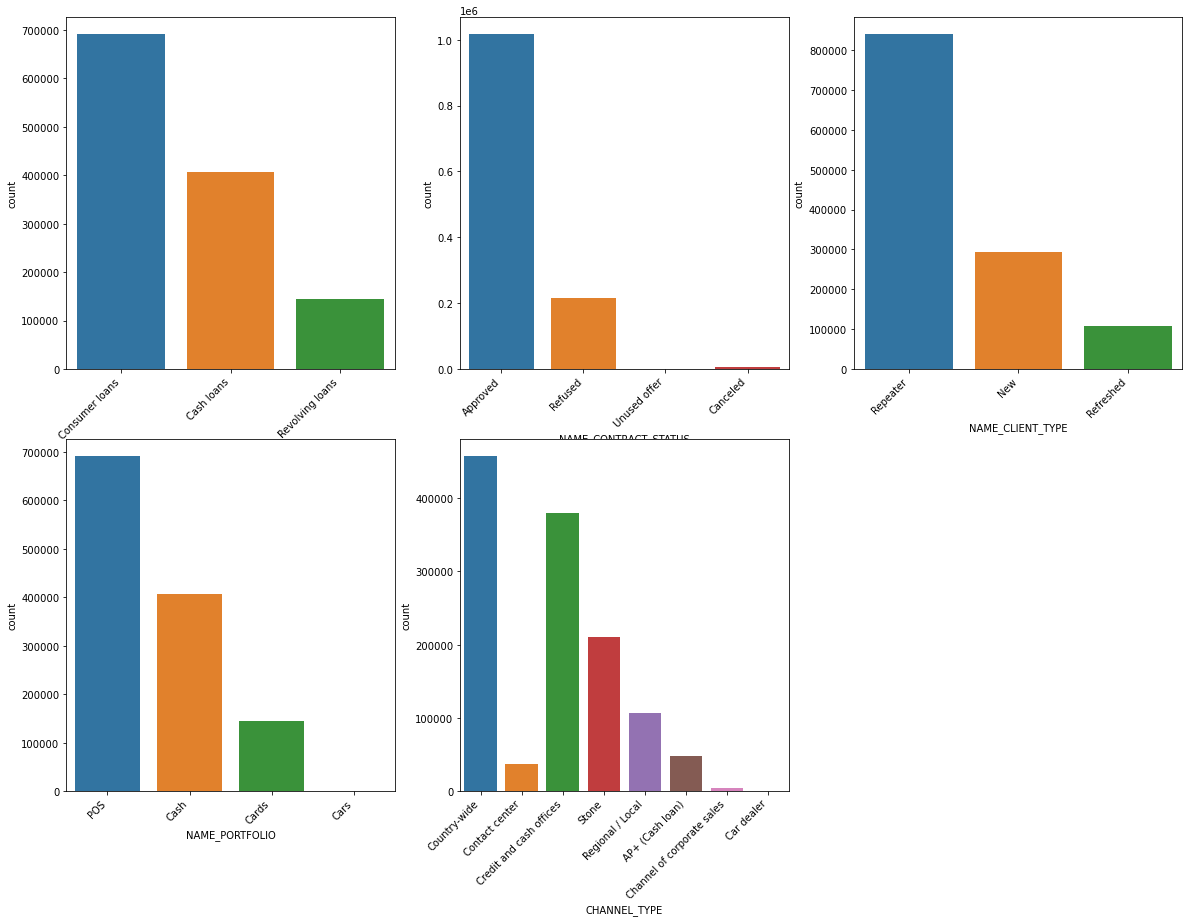

In [120]:
# Listing columns for check data imbalance and plotting them
col_list = ['NAME_CONTRACT_TYPE','NAME_CONTRACT_STATUS','NAME_CLIENT_TYPE','NAME_PORTFOLIO','CHANNEL_TYPE']            
k=0
plt.figure(figsize=(20,22))
for col in col_list:    
    k=k+1
    plt.subplot(3, 3,k)    
    #df_application_prev[col].value_counts().plot(kind='bar');
    ax = sns.countplot(x = col , data = df_application_prev )
    temp = ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment='right')

Nous pouvons constater qu'il y a un déséquilibre des données dans les colonnes ci-dessous:-
1. NAME_CONTRACT_TYPE - Il y a très peu de `Prêts renouvelables`.
2. NAME_CONTRACT_STATUS - Il y a très peu de prêts "Refusés". Les prêts "annulés" sont presque négligeables.
3. NAME_CLIENT_TYPE - Il y a très peu de "nouveaux" demandeurs. Il y a encore moins de demandeurs ayant renouvelé leur demande.
4. NAME_PORTFOLIO - Très peu de demandes de cartes et de voitures.
5. CHANNEL_TYPE - A l'exception de `Country-Wide`, `Credit and Cash offices` et `Stone`, tous les autres canaux sont très peu nombreux.

#### Conversion de la colonne `DAYS_DECISION` en colonne `MONTH_DECISION` pour des raisons de lisibilité et d'analyse.

In [121]:
# Divide 'DAYS_DECISION' by 30 for taking MONTH_DECISION
df_application_prev['MONTH_DECISION'] = abs(df_application_prev['DAYS_DECISION']//30)

In [122]:
# Drop 'DAYS_DECISION' column
df_application_prev = df_application_prev.drop(['DAYS_DECISION'],axis=1)

In [123]:
df_application_prev.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,NAME_CONTRACT_STATUS,NAME_CLIENT_TYPE,NAME_PORTFOLIO,CHANNEL_TYPE,SELLERPLACE_AREA,CNT_PAYMENT,PRODUCT_COMBINATION,MONTH_DECISION
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,17145.0,Approved,Repeater,POS,Country-wide,35,12.0,POS mobile with interest,3
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,607500.0,Approved,Repeater,Cash,Contact center,-1,36.0,Cash X-Sell: low,6
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,112500.0,Approved,Repeater,Cash,Credit and cash offices,-1,12.0,Cash X-Sell: high,11
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,450000.0,Approved,Repeater,Cash,Credit and cash offices,-1,12.0,Cash X-Sell: middle,18
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,337500.0,Refused,Repeater,Cash,Credit and cash offices,-1,24.0,Cash Street: high,27


In [124]:
df_application_prev.shape

(1242076, 15)

### Fusionner les données Current application and Previous application

In [125]:
# Columns to take from current application dataset
cols_current = ['SK_ID_CURR','TARGET','CODE_GENDER','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','AGE_GROUP','INCOME_GROUP','EXT_SCORE_CATEGORY']

In [126]:
# Creating a dataset from current application for merging 
df_current_to_merge = df_application_current[cols_current]
df_current_to_merge.head()

,SK_ID_CURR,TARGET,CODE_GENDER,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,AGE_GROUP,INCOME_GROUP,EXT_SCORE_CATEGORY
0,100002,1,M,Secondary / secondary special,Single / not married,Young,High,Low
1,100003,0,F,Higher education,Married,Mid Age,High,Medium
2,100004,0,M,Secondary / secondary special,Single / not married,Mid Age,Low,High
3,100006,0,F,Secondary / secondary special,Civil marriage,Mid Age,Medium,Medium
4,100007,0,M,Secondary / secondary special,Single / not married,Mid Age,Medium,Medium


In [127]:
# Columns to remove from previous application dataset
cols_prev_to_drop = ['SELLERPLACE_AREA','PRODUCT_COMBINATION','AMT_GOODS_PRICE']

In [128]:
# Creating  a dataset from previous application for merging
df_prev_to_merge = df_application_prev.drop(cols_prev_to_drop,axis=1)
df_prev_to_merge.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,NAME_CONTRACT_STATUS,NAME_CLIENT_TYPE,NAME_PORTFOLIO,CHANNEL_TYPE,CNT_PAYMENT,MONTH_DECISION
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,Approved,Repeater,POS,Country-wide,12.0,3
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,Approved,Repeater,Cash,Contact center,36.0,6
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,Approved,Repeater,Cash,Credit and cash offices,12.0,11
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,Approved,Repeater,Cash,Credit and cash offices,12.0,18
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,Refused,Repeater,Cash,Credit and cash offices,24.0,27


In [129]:
# Merging both the datasets
df_merged = pd.merge(df_prev_to_merge,df_current_to_merge, on='SK_ID_CURR', how='left')
df_merged.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,NAME_CONTRACT_STATUS,NAME_CLIENT_TYPE,NAME_PORTFOLIO,CHANNEL_TYPE,CNT_PAYMENT,MONTH_DECISION,TARGET,CODE_GENDER,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,AGE_GROUP,INCOME_GROUP,EXT_SCORE_CATEGORY
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,Approved,Repeater,POS,Country-wide,12.0,3,0.0,F,Incomplete higher,Married,Mid Age,High,High
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,Approved,Repeater,Cash,Contact center,36.0,6,0.0,F,Secondary / secondary special,Civil marriage,Mid Age,Low,Medium
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,Approved,Repeater,Cash,Credit and cash offices,12.0,11,0.0,F,Secondary / secondary special,Married,Young,Low,Low
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,Approved,Repeater,Cash,Credit and cash offices,12.0,18,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,Refused,Repeater,Cash,Credit and cash offices,24.0,27,0.0,F,Secondary / secondary special,Married,Young,High,Medium


In [130]:
df_merged.shape

(1242076, 19)

In [131]:
len(df_merged[np.isnan(df_merged['TARGET'])])

286969

Nous pouvons voir qu'il y a des valeurs NaN dans les colonnes de l'application actuelle dans les ensembles de données fusionnés. En effet, quelques `SK_ID_CURR` sont présents dans l'ensemble de données de l'application précédente, mais ces ID ne sont pas présents dans l'ensemble de données de l'application actuelle.
Par exemple : `SK_ID_CURR == 176158` est présent dans l'application précédente mais pas dans l'application actuelle.
Nous allons supprimer ces enregistrements.

In [132]:
df_merged = df_merged[(~(np.isnan(df_merged['TARGET'])))]         

In [133]:
# Converting TARGET column from float64 to Int64
df_merged['TARGET'] = df_merged['TARGET'].astype('int64')

In [134]:
df_merged.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,NAME_CONTRACT_STATUS,NAME_CLIENT_TYPE,NAME_PORTFOLIO,CHANNEL_TYPE,CNT_PAYMENT,MONTH_DECISION,TARGET,CODE_GENDER,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,AGE_GROUP,INCOME_GROUP,EXT_SCORE_CATEGORY
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,Approved,Repeater,POS,Country-wide,12.0,3,0,F,Incomplete higher,Married,Mid Age,High,High
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,Approved,Repeater,Cash,Contact center,36.0,6,0,F,Secondary / secondary special,Civil marriage,Mid Age,Low,Medium
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,Approved,Repeater,Cash,Credit and cash offices,12.0,11,0,F,Secondary / secondary special,Married,Young,Low,Low
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,Refused,Repeater,Cash,Credit and cash offices,24.0,27,0,F,Secondary / secondary special,Married,Young,High,Medium
5,1383531,199383,Cash loans,23703.930,315000.0,340573.5,Approved,Repeater,Cash,Credit and cash offices,18.0,23,0,M,Secondary / secondary special,Civil marriage,Mid Age,High,Medium


Nous pouvons créer une nouvelle colonne dérivée pour connaître le pourcentage du montant appliqué qui a été crédité pour chaque client. 
Nom de la colonne dérivée :- `PERCENT_CREDIT`

In [135]:
df_merged['PERCENT_CREDIT'] = round(((df_merged['AMT_CREDIT']/df_merged['AMT_APPLICATION'])*100),2)
df_merged.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,NAME_CONTRACT_STATUS,NAME_CLIENT_TYPE,NAME_PORTFOLIO,CHANNEL_TYPE,CNT_PAYMENT,MONTH_DECISION,TARGET,CODE_GENDER,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,AGE_GROUP,INCOME_GROUP,EXT_SCORE_CATEGORY,PERCENT_CREDIT
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,Approved,Repeater,POS,Country-wide,12.0,3,0,F,Incomplete higher,Married,Mid Age,High,High,100.00
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,Approved,Repeater,Cash,Contact center,36.0,6,0,F,Secondary / secondary special,Civil marriage,Mid Age,Low,Medium,111.88
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,Approved,Repeater,Cash,Credit and cash offices,12.0,11,0,F,Secondary / secondary special,Married,Young,Low,Low,121.28
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,Refused,Repeater,Cash,Credit and cash offices,24.0,27,0,F,Secondary / secondary special,Married,Young,High,Medium,119.72
5,1383531,199383,Cash loans,23703.930,315000.0,340573.5,Approved,Repeater,Cash,Credit and cash offices,18.0,23,0,M,Secondary / secondary special,Civil marriage,Mid Age,High,Medium,108.12


### Univariate analysis on unordered categorical variable

#### Statut du prêt précédent

[Text(0.5, 0, 'Loan status')]

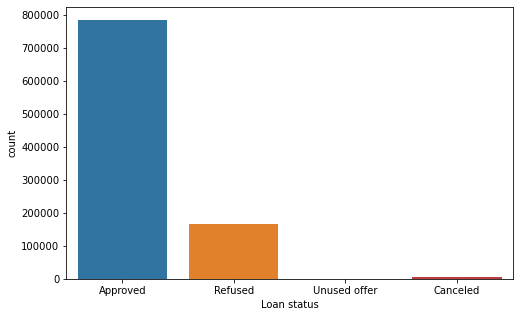

In [136]:
plt.figure(figsize=(8,5))   
ax = sns.countplot(x = 'NAME_CONTRACT_STATUS',data=df_merged)
ax.set(xlabel='Loan status')


##### Analysis
Il y a beaucoup plus de prêts "approuvés" que de prêts "refusés". Il n'y a pratiquement pas de prêt "annulé" ou "offre inutilisée".

#### Client type

[Text(0.5, 0, 'Client type')]

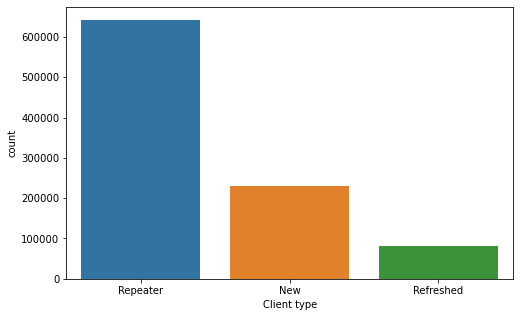

In [137]:
plt.figure(figsize=(8,5))   
ax = sns.countplot(x = 'NAME_CLIENT_TYPE',data=df_merged)
ax.set(xlabel='Client type')

##### Analysis
La plupart des candidats étaient des.`Repeater`

#### Portfolio of the previous applications

[Text(0.5, 0, 'Portfolio')]

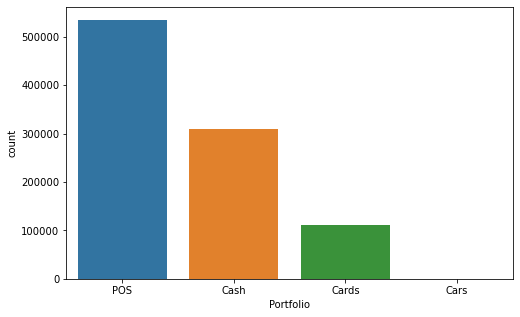

In [138]:
plt.figure(figsize=(8,5))   
ax = sns.countplot(x = 'NAME_PORTFOLIO',data=df_merged)
ax.set(xlabel='Portfolio')

##### Analysis
Le nombre le plus élevé des demandes précédentes concernait le POS. Les demandes pour les espèces ont également été nombreuses. Les demandes pour les cartes sont très peu nombreuses.

#### Application channel type

[Text(0.5, 0, 'Application channel')]

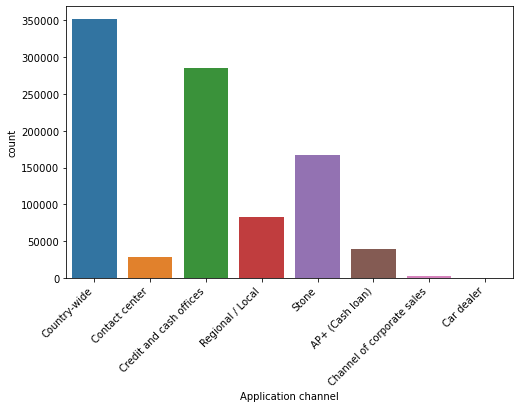

In [139]:
plt.figure(figsize=(8,5))   
ax = sns.countplot(x = 'CHANNEL_TYPE',data=df_merged)
temp = ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment='right')
ax.set(xlabel='Application channel')

##### Analysis
Nous constatons que le canal "Country-wide" a été fortement utilisé pour les demandes précédentes, suivi par les canaux "Credit and Cash offices", "Stone" et "Regional". Les autres canaux sont à peine utilisés. 

### Analyse univariée pour les variables continues

#### Montant du prêt demandé

[Text(0.5, 0, 'Application amount')]

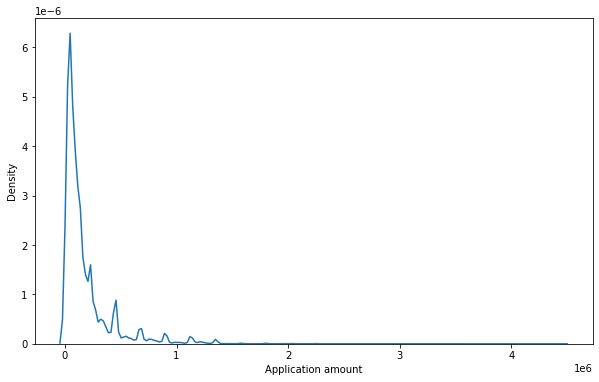

In [140]:
plt.figure(figsize=(10,6))
ax = sns.distplot(df_merged['AMT_APPLICATION'],hist=False)
ax.set(xlabel='Application amount')

##### Analysis
La plupart des demandes concernaient des montants inférieurs à 25 000 euros, comme le montre la répartition ci-dessus.

#### Credited loan amount

[Text(0.5, 0, 'Credited amount')]

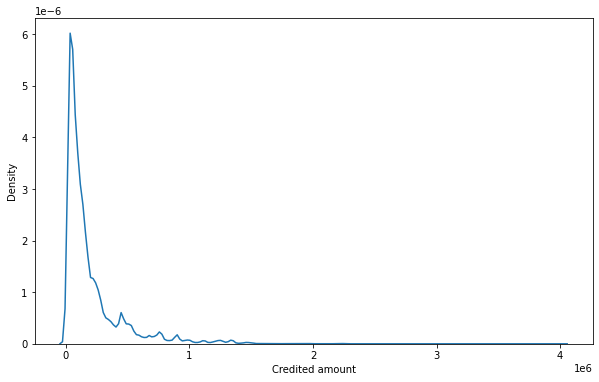

In [141]:
plt.figure(figsize=(10,6))
ax = sns.distplot(df_merged['AMT_CREDIT'],hist=False)
ax.set(xlabel='Credited amount')

##### Analysis
La répartition du montant crédité du prêt se situait principalement dans la tranche des 25 000 000.

#### Months took for the pervious application decision relative to the current application 

[Text(0.5, 0, 'Months')]

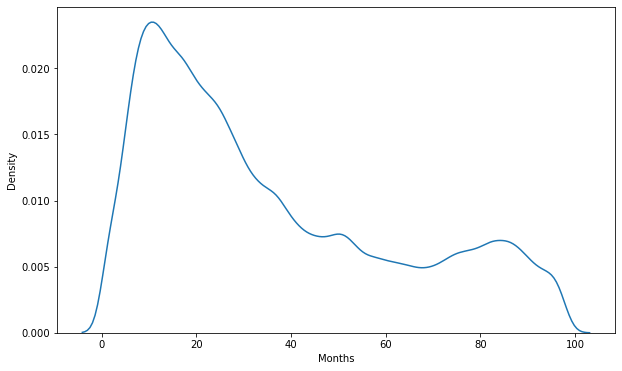

In [142]:
plt.figure(figsize=(10,6))
ax = sns.distplot(df_merged['MONTH_DECISION'],hist=False)
ax.set(xlabel='Months')

##### Analysis
Nous pouvons constater que la plupart des décisions relatives aux demandes ont été prises dans un délai d'environ 30 mois. Le délai peut aller jusqu'à 100 mois.

## Analyse à deux niveaux

#### Corelation of relevant numerical columns

In [143]:
# Listing the relevant columns for finding corelation
corr_cols = ['AMT_APPLICATION','AMT_CREDIT','AMT_ANNUITY','PERCENT_CREDIT','CNT_PAYMENT','MONTH_DECISION']

In [144]:
# Creating dataframe for numerical columns
df_merged_corr = df_merged[corr_cols]
df_merged_corr.head()

,AMT_APPLICATION,AMT_CREDIT,AMT_ANNUITY,PERCENT_CREDIT,CNT_PAYMENT,MONTH_DECISION
0,17145.0,17145.0,1730.430,100.00,12.0,3
1,607500.0,679671.0,25188.615,111.88,36.0,6
2,112500.0,136444.5,15060.735,121.28,12.0,11
4,337500.0,404055.0,31924.395,119.72,24.0,27
5,315000.0,340573.5,23703.930,108.12,18.0,23


In [145]:
# Corelation matrix
df_merged_corr.corr()

,AMT_APPLICATION,AMT_CREDIT,AMT_ANNUITY,PERCENT_CREDIT,CNT_PAYMENT,MONTH_DECISION
AMT_APPLICATION,1.000000,0.953389,0.830663,0.179395,0.592375,-0.288808
AMT_CREDIT,0.953389,1.000000,0.847825,0.261587,0.567978,-0.293229
AMT_ANNUITY,0.830663,0.847825,1.000000,0.200139,0.352648,-0.269146
PERCENT_CREDIT,0.179395,0.261587,0.200139,1.000000,0.391865,-0.264627
CNT_PAYMENT,0.592375,0.567978,0.352648,0.391865,1.000000,-0.197025
MONTH_DECISION,-0.288808,-0.293229,-0.269146,-0.264627,-0.197025,1.000000


<AxesSubplot:>

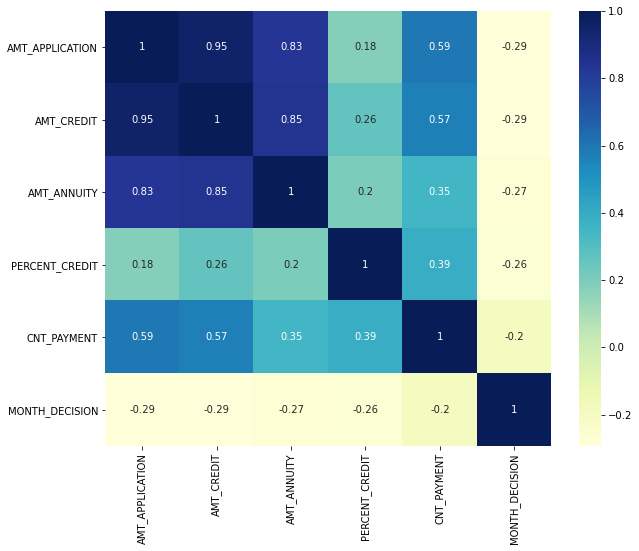

In [146]:
plt.figure(figsize=(10,8))
sns.heatmap(df_merged_corr.corr(),cmap="YlGnBu",annot=True)

**Colonnes hautement corrélées**
1. AMT_APPLICATION et AMT_CREDIT
2. AMT_APPLICATION et AMT_ANNUITY	
3. AMT_CREDIT et AMT_ANNUITÉ

**Colonnes modérément corrélées**
1. AMT_APPLICATION et CNT_PAYMENT
2. AMT_CREDIT et CNT_PAYMENT

### Bivariate analysis on continious variable

#### Montant de la demande et montant crédité

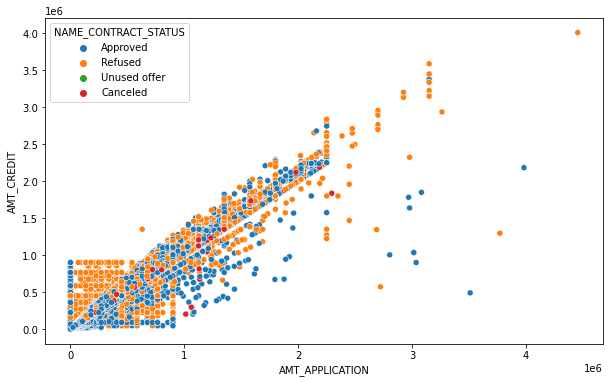

In [147]:
plt.figure(figsize=(10,6))
ax = sns.scatterplot('AMT_APPLICATION','AMT_CREDIT',hue='NAME_CONTRACT_STATUS', data=df_merged)

##### Analysis
Nous pouvons constater que les demandes sont plus concentrées sur le montant le plus faible et qu'il en va de même pour le montant crédité. De même, le montant crédité augmente en fonction du montant de la demande.

#### Montant de la demande et mois nécessaire pour prendre la décision relative à la demande en cours

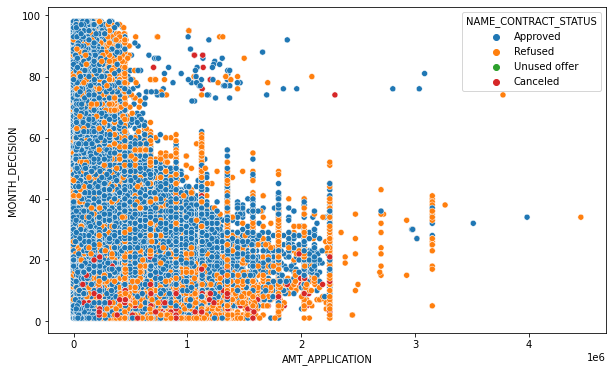

In [148]:
plt.figure(figsize=(10,6))
ax = sns.scatterplot('AMT_APPLICATION','MONTH_DECISION',hue='NAME_CONTRACT_STATUS', data=df_merged)

##### Analysis
Nous pouvons constater que plus le montant de la demande de prêt est élevé, moins le nombre de mois précédant la demande actuelle est important. Cela signifie que la plupart des demandes de prêt d'un montant élevé ont été décidées récemment par rapport aux demandes de prêt d'un montant moins élevé. 

### Bivariate analysis on categorical variable

#### Montant du crédit du prêt de différentes catégories

In [149]:
# Category list
categories = ['NAME_CONTRACT_TYPE','NAME_CLIENT_TYPE','NAME_PORTFOLIO','CHANNEL_TYPE']

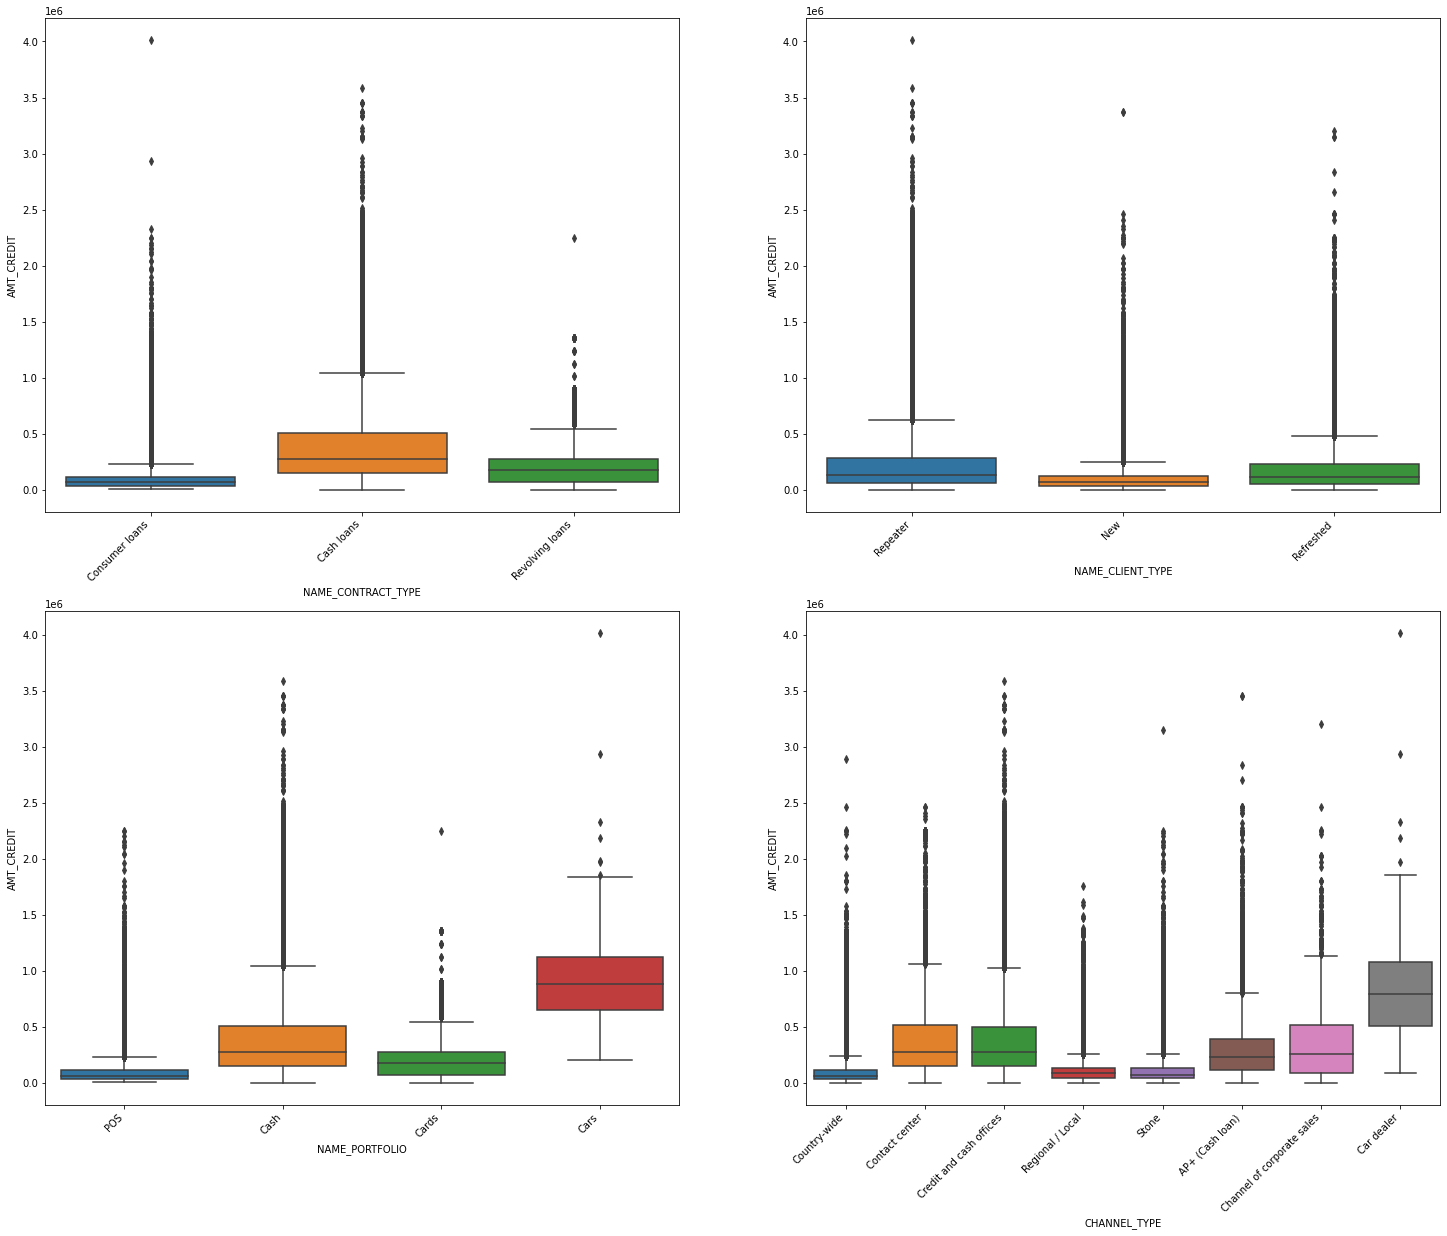

In [150]:
plt.figure(figsize=(25,20))
k=0
for category in categories:
    k = k+1
    ax = plt.subplot(2,2,k)
    sns.boxplot(x = category, y = 'AMT_CREDIT', data=df_merged)
    temp = ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment='right')

##### Analysis
1. Les "crédits de trésorerie" sont d'un montant plus élevé que les crédits renouvelables et les crédits à la consommation.
2. Les clients "récidivistes" obtiennent un montant de prêt plus élevé que les clients nouveaux et renouvelés.
3. Les prêts avec un portefeuille "voitures" sont les plus crédités, suivis par les prêts "cash".
4. Le montant du crédit est plus élevé pour le canal de demande de type "concessionnaire automobile", suivi par le "canal de vente aux entreprises", les "bureaux de crédit et d'encaissement" et le "centre de contact". Le montant est très faible pour les canaux `Régional`, `Stone` et `Country-wide`.

#### Analysis of two segmented variables

#### Status and Client type

<AxesSubplot:xlabel='NAME_CLIENT_TYPE', ylabel='count'>

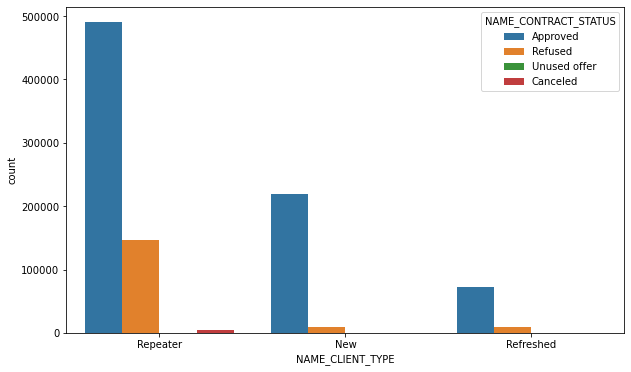

In [152]:
plt.figure(figsize=(10,6))

sns.countplot(x = 'NAME_CLIENT_TYPE' ,hue = 'NAME_CONTRACT_STATUS', data = df_merged )

##### Analysis
Nous constatons que les clients "repeaters" ont plus de prêts approuvés que les clients "new" et "refresh".

#### Situation actuelle de défaillance par rapport à la situation antérieure de la demande de prêt

Text(0, 0.5, 'Current defaulters')

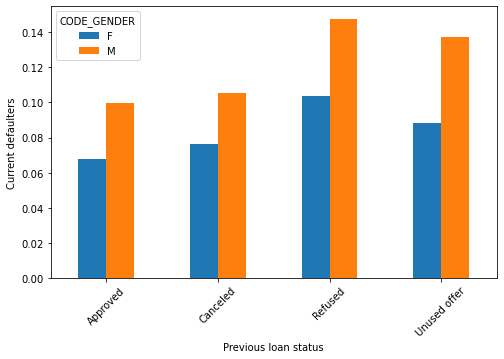

In [153]:
df_merged.pivot_table(values='TARGET',index='NAME_CONTRACT_STATUS',columns='CODE_GENDER',aggfunc='mean').plot.bar(figsize=(8,5),rot=45)
plt.xlabel('Previous loan status')
plt.ylabel('Current defaulters')

##### Analysis
Nous constatons que les clients précédemment "Refusés" sont plus nombreux que les clients précédemment "Approuvés". De même, dans tous les cas, les "hommes" sont plus défaillants que les "femmes".

#### Situation actuelle des mauvais payeurs par rapport à la situation des demandes de prêt antérieures et aux types de clients.

Text(0, 0.5, 'Current defaulters')

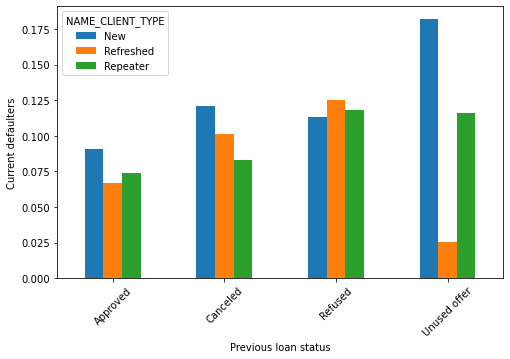

In [154]:
df_merged.pivot_table(values='TARGET',index='NAME_CONTRACT_STATUS',columns='NAME_CLIENT_TYPE',aggfunc='mean').plot.bar(figsize=(8,5),rot=45)
plt.xlabel('Previous loan status')
plt.ylabel('Current defaulters')

##### Analysis
1. Nous pouvons voir que les "Défaillants" sont plus nombreux pour les clients qui avaient précédemment le statut de prêt "Offres inutilisées", qui étaient "Nouveaux".
2. En ce qui concerne le statut "Approuvé", les "Nouveaux" sont les plus nombreux à être en défaut de paiement, suivis par les "Répétiteurs".
3. Pour les demandeurs dont la demande a été refusée précédemment, les " défaillants " sont plus nombreux que les clients dont la demande a été renouvelée.
4. Pour les candidats précédemment "Annulés", les "Défaillants" sont plus nombreux que les "Nouveaux clients".

#### Statut de l'emprunteur actuel par rapport au statut de l'emprunteur précédent et au groupe d'âge

Text(0, 0.5, 'Current defaulters')

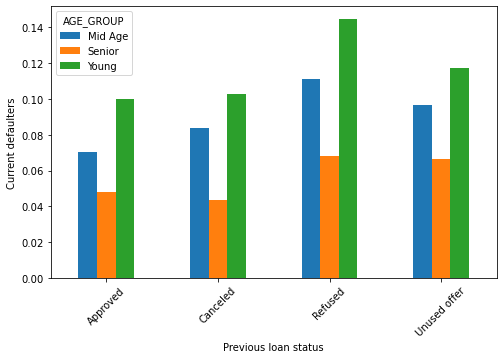

In [155]:
df_merged.pivot_table(values='TARGET',index='NAME_CONTRACT_STATUS',columns='AGE_GROUP',aggfunc='mean').plot.bar(figsize=(8,5),rot=45)
plt.xlabel('Previous loan status')
plt.ylabel('Current defaulters')

##### Analysis
1. Pour tous les statuts précédents, les candidats "jeunes" sont les plus défaillants.
2. Pour tous les statuts précédents, les candidats "seniors" sont moins défaillants que les autres.

#### Situation actuelle de défaillance par rapport à la situation de la demande de prêt précédente et à la catégorie de revenu

Text(0, 0.5, 'Current defaulters')

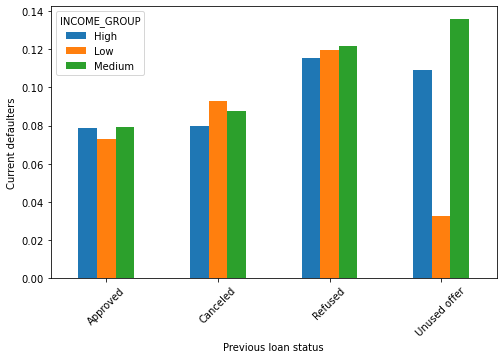

In [156]:
df_merged.pivot_table(values='TARGET',index='NAME_CONTRACT_STATUS',columns='INCOME_GROUP',aggfunc='mean').plot.bar(figsize=(8,5),rot=45)
plt.xlabel('Previous loan status')
plt.ylabel('Current defaulters')

##### Analysis
1. En ce qui concerne les offres précédemment "inutilisées", la catégorie des revenus moyens a été la plus touchée par les défauts de paiement, tandis que la catégorie des faibles revenus est la moins touchée.
2. Pour les autres statuts de demande, toutes les catégories de revenus sont plus ou moins touchées par les défauts de paiement. 

#### Statut actuel d'emprunteur défaillant par rapport au statut de la demande de prêt précédente et au portefeuille de prêts.

Text(0, 0.5, 'Current defaulters')

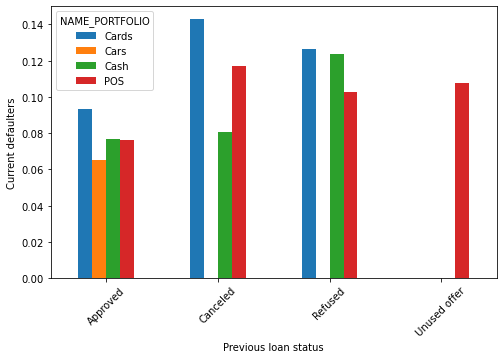

In [157]:
df_merged.pivot_table(values='TARGET',index='NAME_CONTRACT_STATUS',columns='NAME_PORTFOLIO',aggfunc='mean').plot.bar(figsize=(8,5),rot=45)
plt.xlabel('Previous loan status')
plt.ylabel('Current defaulters')

##### Analysis
1. La plupart des clients étaient en défaut de paiement et avaient précédemment demandé un prêt pour des "cartes".
2. En ce qui concerne les prêts approuvés, les clients qui ont demandé un prêt pour une voiture sont moins en défaut de paiement.
3. Pour les prêts refusés, le nombre de clients ayant demandé un prêt " POS " est inférieur au nombre de défaillances.

#### Statut actuel d'emprunteur défaillant par rapport au statut de la demande de prêt précédente et à la catégorie de score de la source externe.

Text(0, 0.5, 'Current defaulters')

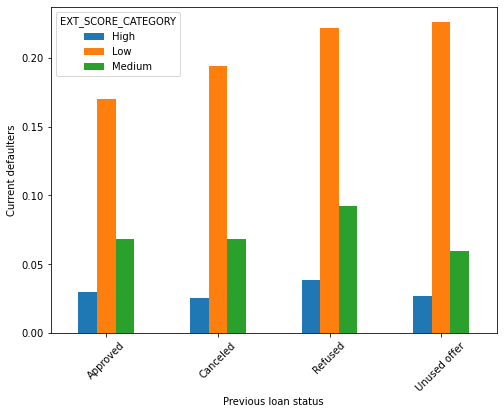

In [158]:
df_merged.pivot_table(values='TARGET',index='NAME_CONTRACT_STATUS',columns='EXT_SCORE_CATEGORY',aggfunc='mean').plot.bar(figsize=(8,6),rot=45)
plt.xlabel('Previous loan status')
plt.ylabel('Current defaulters')

##### Analysis
1. Les candidats ayant un faible score pour les sources externes sont très souvent en défaut de paiement.
2. Les demandeurs ayant un score élevé sont très susceptibles d'être en défaut de paiement, quel que soit le statut de leur prêt précédent.

# Final Notes

**Groupes fortement recommandés:-***

1. Clients approuvés dans leurs demandes précédentes.
2. Clients ayant un niveau d'éducation élevé et des revenus plus importants.
3. Les clients ayant un score plus élevé en matière de sources externes.
4. Les seniors, toutes catégories confondues.
5. Les clients mariés par rapport aux autres situations familiales.
6. Les femmes sont comparativement plus favorables que les hommes.

***Groupes à haut risque:-***

1. Clients dont l'offre a déjà été refusée, annulée ou inutilisée.
2. Les groupes à faibles revenus ayant déjà fait l'objet d'un refus.
3. Les chômeurs.
4. Les mauvais évaluateurs de sources externes.
5. Les jeunes clients sont comparativement plus risqués que les clients d'âge moyen et les personnes âgées.
6. Les clients ayant un niveau d'éducation secondaire inférieur et secondaire.